In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats
import pylab
import pandas as pd
import pathlib
plt.style.use('fivethirtyeight')
from utils import plotUtils
import datetime as dt
import matplotlib.dates as mdates
import statsmodels.api as sm
from scipy.stats import norm
import statistics

In [2]:
fname_gas = pathlib.Path().resolve() / "data" / "FuturosGasNatural.csv"
fname_petroleo_brent = pathlib.Path().resolve() / "data" / "FuturosPetroleoBrent.csv"
fname_carbon = pathlib.Path().resolve() / "data" / "FuturosNewcastleCarbon.csv"
gas = pd.read_csv(fname_gas, decimal=',')
petroleo_brent = pd.read_csv(fname_petroleo_brent, decimal=',')
carbon = pd.read_csv(fname_carbon, decimal=',')
carbon

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,13.04.2022,312.00,312.00,312.00,312.00,"0,04K","0,94%"
1,12.04.2022,309.10,300.00,303.50,300.00,"0,06K","6,35%"
2,11.04.2022,290.65,292.00,292.00,292.00,"0,04K","-0,33%"
3,08.04.2022,291.60,291.60,291.60,291.60,"0,04K","3,53%"
4,07.04.2022,281.65,296.00,296.00,285.00,"0,10K","0,23%"
...,...,...,...,...,...,...,...
3412,12.12.2008,74.04,74.04,74.04,74.04,"0,01K","-2,42%"
3413,11.12.2008,75.88,75.88,75.88,75.88,"0,02K","6,77%"
3414,10.12.2008,71.07,71.07,71.07,71.07,"0,02K","0,81%"
3415,09.12.2008,70.50,70.50,70.50,70.50,-,"0,07%"


# Varias figuras en la misma

In [3]:
def compoundReturn(dataFrame):
    array = np.empty(dataFrame.size)
    for i in dataFrame.index:
        array[i] = 100 * np.log(dataFrame[i+1] / dataFrame[i])
        if (i + 1 == dataFrame.size - 1):
            break
    return array[::-1]

In [4]:
# 3 es el último
last_price_day_gas = gas["Último"][np.logical_not(np.isnan(gas["Último"]))]
gas_return = compoundReturn(last_price_day_gas)
gas_return

array([ 0.        ,  2.267554  , -2.15283854, ..., -4.28109654,
       -0.76775809,  3.19337521])

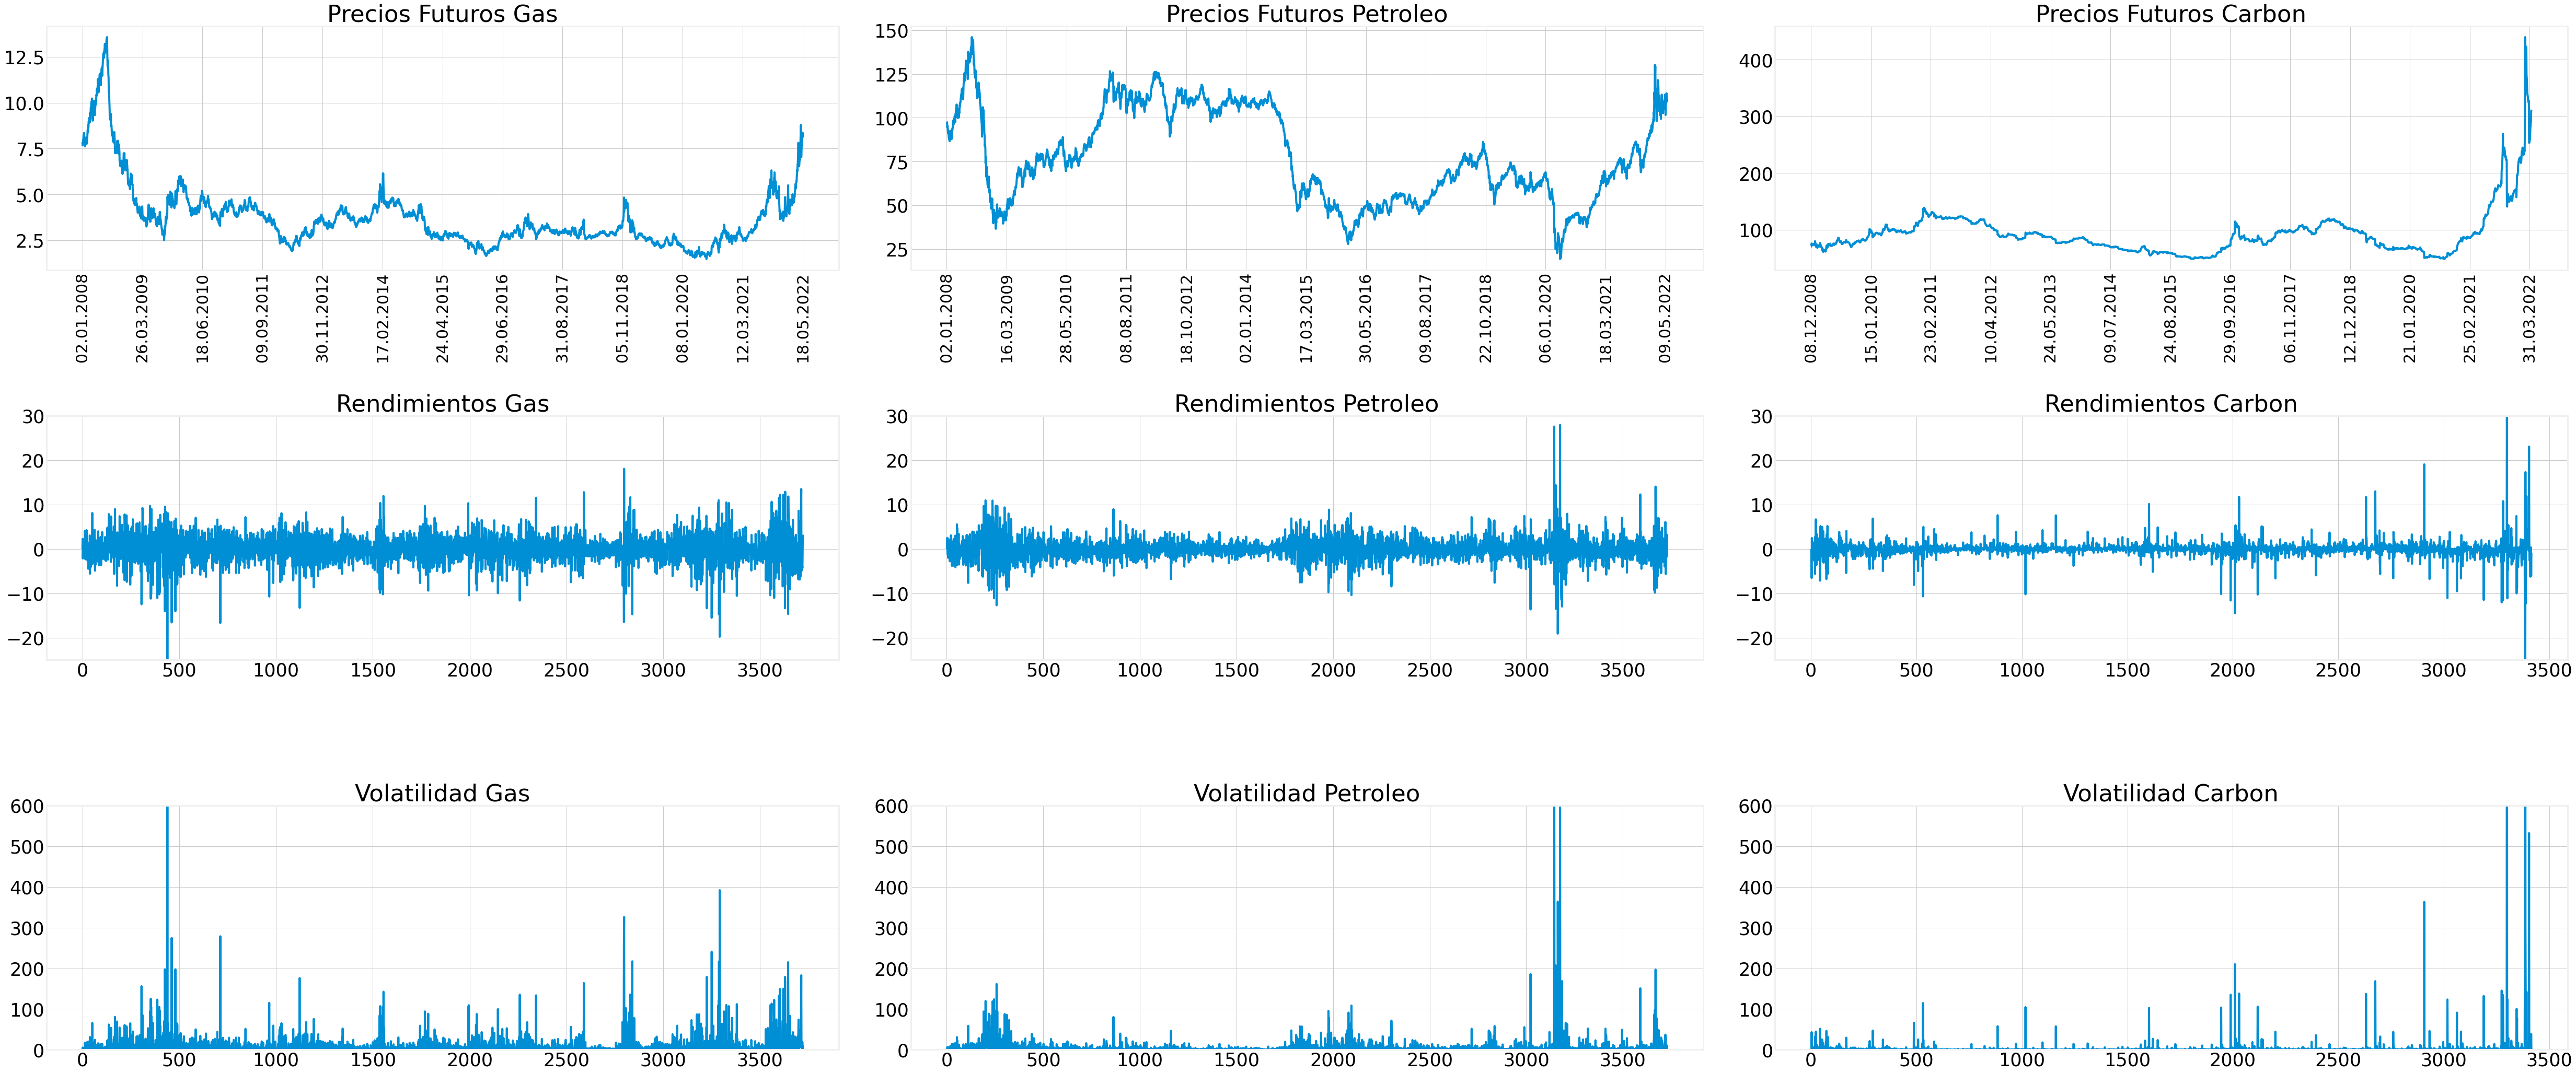

In [5]:
fig, ax = plt.subplots(figsize = (70, 30), nrows=3, ncols=3)

# GAS ######################################################
dates = gas["Fecha"][::-1]
last_price_day_gas = gas["Último"][np.logical_not(np.isnan(gas["Último"]))]
gas_return = compoundReturn(last_price_day_gas)
# Historical
ax[0,0].plot(dates, last_price_day_gas[::-1])
ax[0,0].fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax[0,0].tick_params(axis='x', labelsize=30,rotation=90, bottom=0.3)
ax[0,0].set_xticks(np.arange(0, len(dates),310, dtype=float))
ax[0,0].set_title('Precios Futuros Gas', fontsize = 45)
ax[0,0].tick_params(axis='y', labelsize=35)
ax[0,0].set_facecolor('w')
# Compound Return
ax[1,0].set_ylim([-25, 30])
ax[1,0].plot(np.arange(0, len(gas_return)), gas_return)
ax[1,0].set_title('Rendimientos Gas', fontsize = 45)
ax[1,0].tick_params(axis='both', labelsize=35)
ax[1,0].set_facecolor('w')
# Volatilidad
ax[2,0].plot(np.square(gas_return))
ax[2,0].set_title('Volatilidad Gas', fontsize = 45)
ax[2,0].tick_params(axis='both', labelsize=35)
ax[2,0].set_ylim([0, 600])
ax[2,0].set_facecolor('w')
# # Petroleo #################################################
dates = petroleo_brent["Fecha"][::-1]
last_price_day_petroleo = petroleo_brent["Último"][np.logical_not(np.isnan(petroleo_brent["Último"]))]
petroleo_return = compoundReturn(last_price_day_petroleo)
# Historical
ax[0,1].plot(dates, last_price_day_petroleo[::-1])
ax[0,1].fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax[0,1].tick_params(axis='x', labelsize=30,rotation=90, bottom=0.3)
ax[0,1].set_xticks(np.arange(0, len(dates),310, dtype=float))
ax[0,1].set_title('Precios Futuros Petroleo', fontsize = 45)
ax[0,1].tick_params(axis='y', labelsize=35)
ax[0,1].set_facecolor('w')
# Compound Return 
ax[1,1].set_ylim([-25, 30])
ax[1,1].plot(np.arange(0, len(petroleo_return)), petroleo_return)
ax[1,1].set_title('Rendimientos Petroleo', fontsize = 45)
ax[1,1].tick_params(axis='both', labelsize=35)
ax[1,1].set_facecolor('w')
# Volatilidad
ax[2,1].plot(np.square(petroleo_return))
ax[2,1].set_title('Volatilidad Petroleo', fontsize = 45)
ax[2,1].tick_params(axis='both', labelsize=35)
ax[2,1].set_ylim([0, 600])
ax[2,1].set_facecolor('w')
# # Carbon ###################################################
dates = carbon["Fecha"][::-1]
last_price_day_carbon = carbon["Último"][np.logical_not(np.isnan(carbon["Último"]))]
carbon_return = compoundReturn(last_price_day_carbon)
# Historical
ax[0,2].plot(dates, last_price_day_carbon[::-1])
ax[0,2].fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax[0,2].tick_params(axis='x', labelsize=30,rotation=90, bottom=0.3)
ax[0,2].set_xticks(np.arange(0, len(dates),284, dtype=float))
ax[0,2].set_title('Precios Futuros Carbon', fontsize = 45)
ax[0,2].tick_params(axis='y', labelsize=35)
ax[0,2].set_facecolor('w')
# Compound Return
ax[1,2].set_ylim([-25, 30])
ax[1,2].plot(np.arange(0, len(carbon_return)), carbon_return)
ax[1,2].set_title('Rendimientos Carbon', fontsize = 45)
ax[1,2].tick_params(axis='both', labelsize=35)
ax[1,2].set_facecolor('w')
# Volatilidad
ax[2,2].plot(np.square(carbon_return))
ax[2,2].set_title('Volatilidad Carbon', fontsize = 45)
ax[2,2].tick_params(axis='both', labelsize=35)
ax[2,2].set_ylim([0, 600])
ax[2,2].set_facecolor('w')

fig.tight_layout(pad=6)

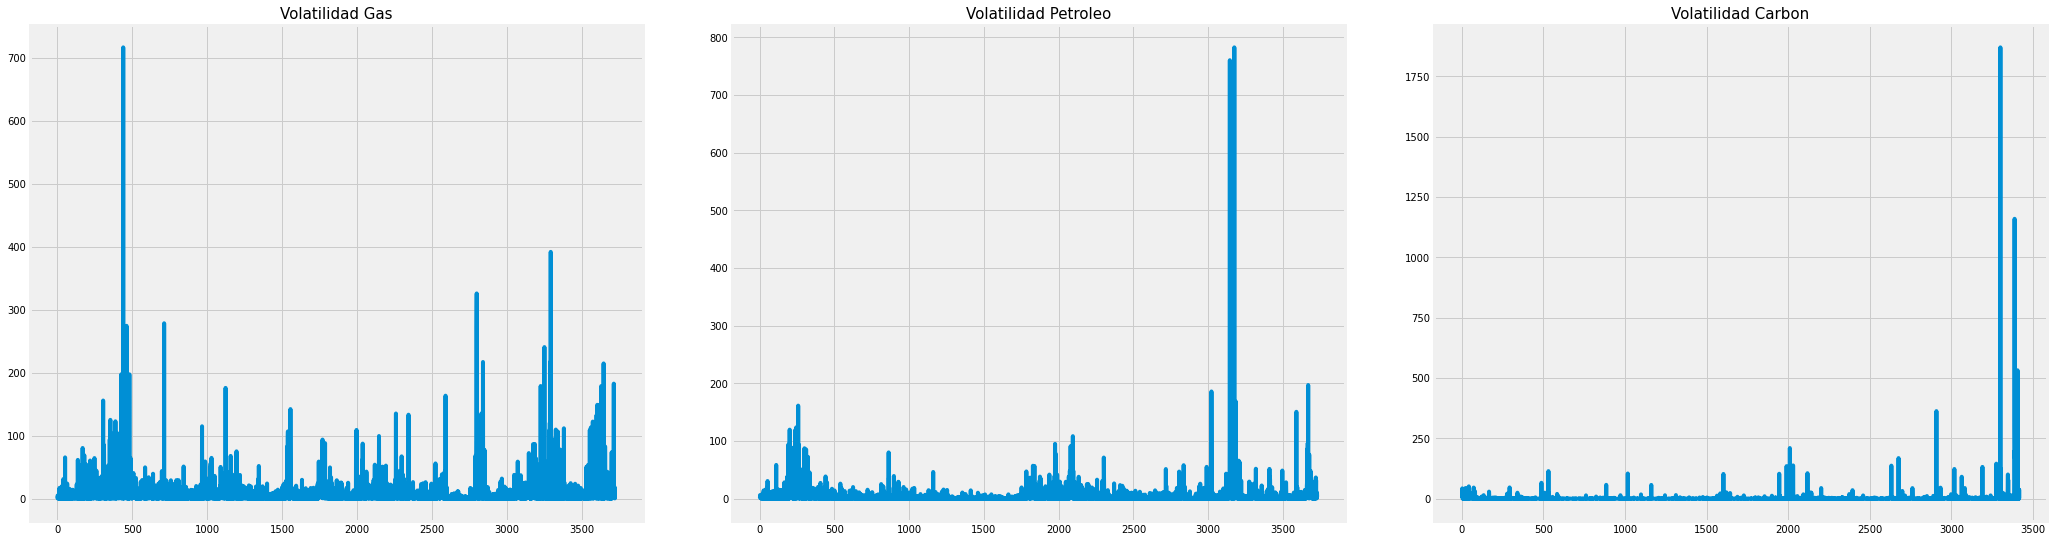

In [6]:
fig, ax = plt.subplots(figsize = (30, 9), nrows=1, ncols=3)

# GAS ######################################################
volatilidad = np.square(gas_return)

ax[0].plot(np.arange(0, len(volatilidad)), volatilidad)
ax[0].set_title('Volatilidad Gas', fontsize = 15)
fig.tight_layout(pad=6)

# Petroleo ######################################################
volatilidad = np.square(petroleo_return)

ax[1].plot(np.arange(0, len(volatilidad)), volatilidad)
ax[1].set_title('Volatilidad Petroleo', fontsize = 15)
fig.tight_layout(pad=6)

# Carbon ######################################################
volatilidad = np.square(carbon_return)

ax[2].plot(np.arange(0, len(volatilidad)), volatilidad)
ax[2].set_title('Volatilidad Carbon', fontsize = 15)
fig.tight_layout(pad=6)

Text(0.5, 1.0, 'Correlogram Carbon')

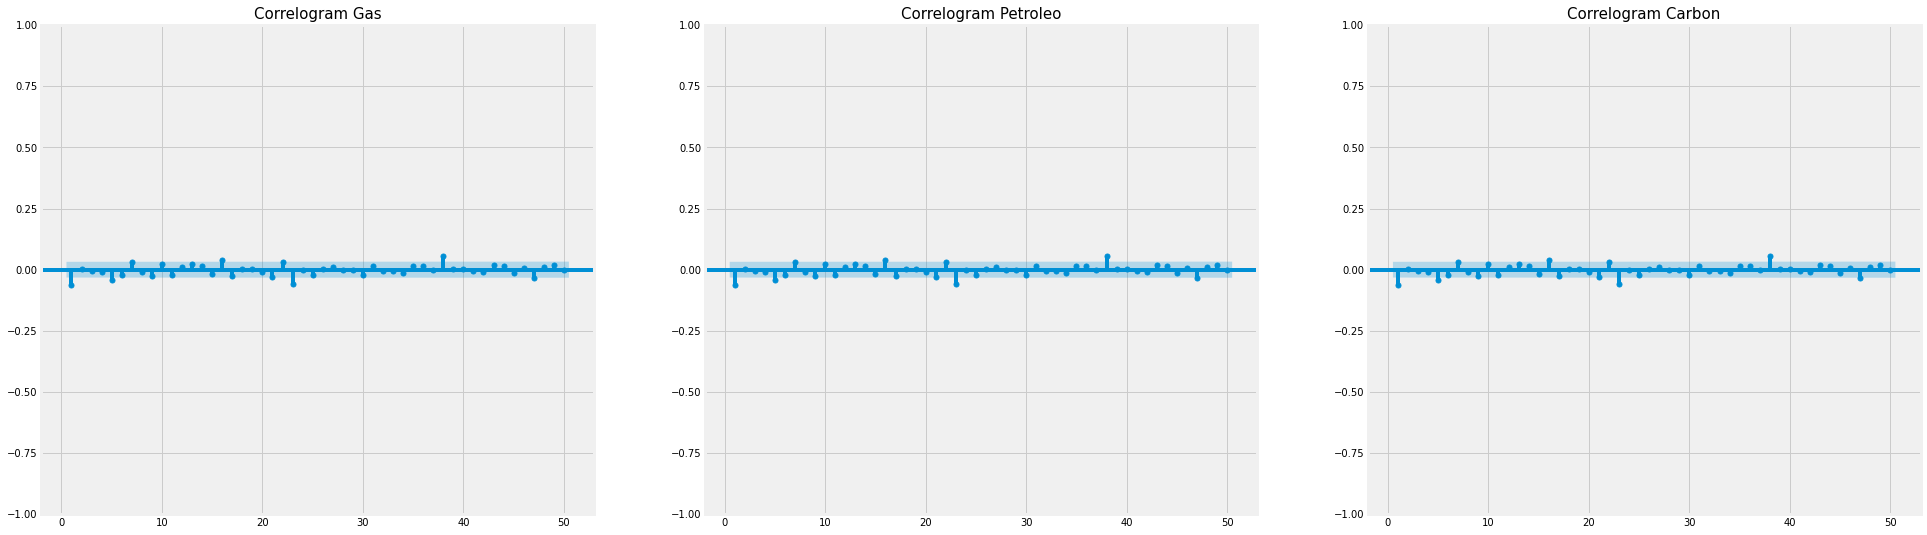

In [7]:
fig, ax = plt.subplots(figsize = (30, 9), nrows=1, ncols=3)

# GAS ######################################################

sm.graphics.tsa.plot_acf(x=gas_return, lags=50, zero=False, title= 'Correlograma Gas', ax=ax[0])
ax[0].set_title('Correlogram Gas', fontsize = 15)

# PETROLEO ######################################################

sm.graphics.tsa.plot_acf(x=gas_return, lags=50, zero=False, title= 'Correlograma Gas', ax=ax[1])
ax[1].set_title('Correlogram Petroleo', fontsize = 15)

# CARBON ######################################################

sm.graphics.tsa.plot_acf(x=gas_return, lags=50, zero=False, title= 'Correlograma Gas', ax=ax[2])
ax[2].set_title('Correlogram Carbon', fontsize = 15)

## Estadistica descriptiva

#### Mean

In [8]:
np.mean(gas_return)

-0.000858882949847435

In [9]:
np.mean(petroleo_return)

-0.0034556505872004096

In [10]:
np.nanmean(carbon_return)

-0.04354989609203373

## Mediana

In [11]:
np.median(gas_return)

9.19e-321

In [12]:
np.median(petroleo_return)

-0.07845915880553418

In [13]:
np.median(carbon_return)

0.0

### Desviación Estandar

In [14]:
np.std(gas_return)

3.171770183539338

In [15]:
np.std(petroleo_return)

2.425985472254448

In [16]:
np.std(carbon_return)

1.8501330774943896

# Max and Min

In [17]:
gas_return.max()

18.054517395020035

In [18]:
gas_return.min()

-26.77118707940863

In [19]:
petroleo_return.max()

27.976149608285578

In [20]:
petroleo_return.min()

-19.07740120271406

In [21]:
carbon_return.max()

43.245393295888604

In [22]:
carbon_return.min()

-34.05715363721537

### Swekness

In [23]:
stats.skew(gas_return)

-0.4405577499084189

In [24]:
stats.skew(petroleo_return)

0.6778484810985486

In [25]:
stats.skew(carbon_return)

2.2621393326757513

### kurstosis

In [26]:
stats.kurtosis(gas_return, fisher=False)

7.375483280297577

In [27]:
stats.kurtosis(petroleo_return, fisher=False)

16.771826900305758

In [28]:
stats.kurtosis(carbon_return, fisher=False)

146.14272807662013

## Histogram + BoxPlot

In [29]:
def addNorm(data, ax):
  # Fit a normal distribution to
  # the data:
  # mean and standard deviation
  mu, std = norm.fit(data) 
    
  # Plot the PDF.
  xmin, xmax = plt.xlim()
  # x = np.linspace(xmin, xmax, 100)
  x = np.linspace(-20, 20, 100)
  p = norm.pdf(x, mu, std)
  ax.plot(x, p, 'k', linewidth=7, color='r')

/var/folders/pr/mdnfvb3x5l3cn_qcjv5rxzqr0000gn/T/ipykernel_2196/3966477366.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, p, 'k', linewidth=7, color='r')
/var/folders/pr/mdnfvb3x5l3cn_qcjv5rxzqr0000gn/T/ipykernel_2196/3966477366.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, p, 'k', linewidth=7, color='r')
/var/folders/pr/mdnfvb3x5l3cn_qcjv5rxzqr0000gn/T/ipykernel_2196/3966477366.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, p, 'k', linewidth=7, color='r')


(-30.0, 30.0)

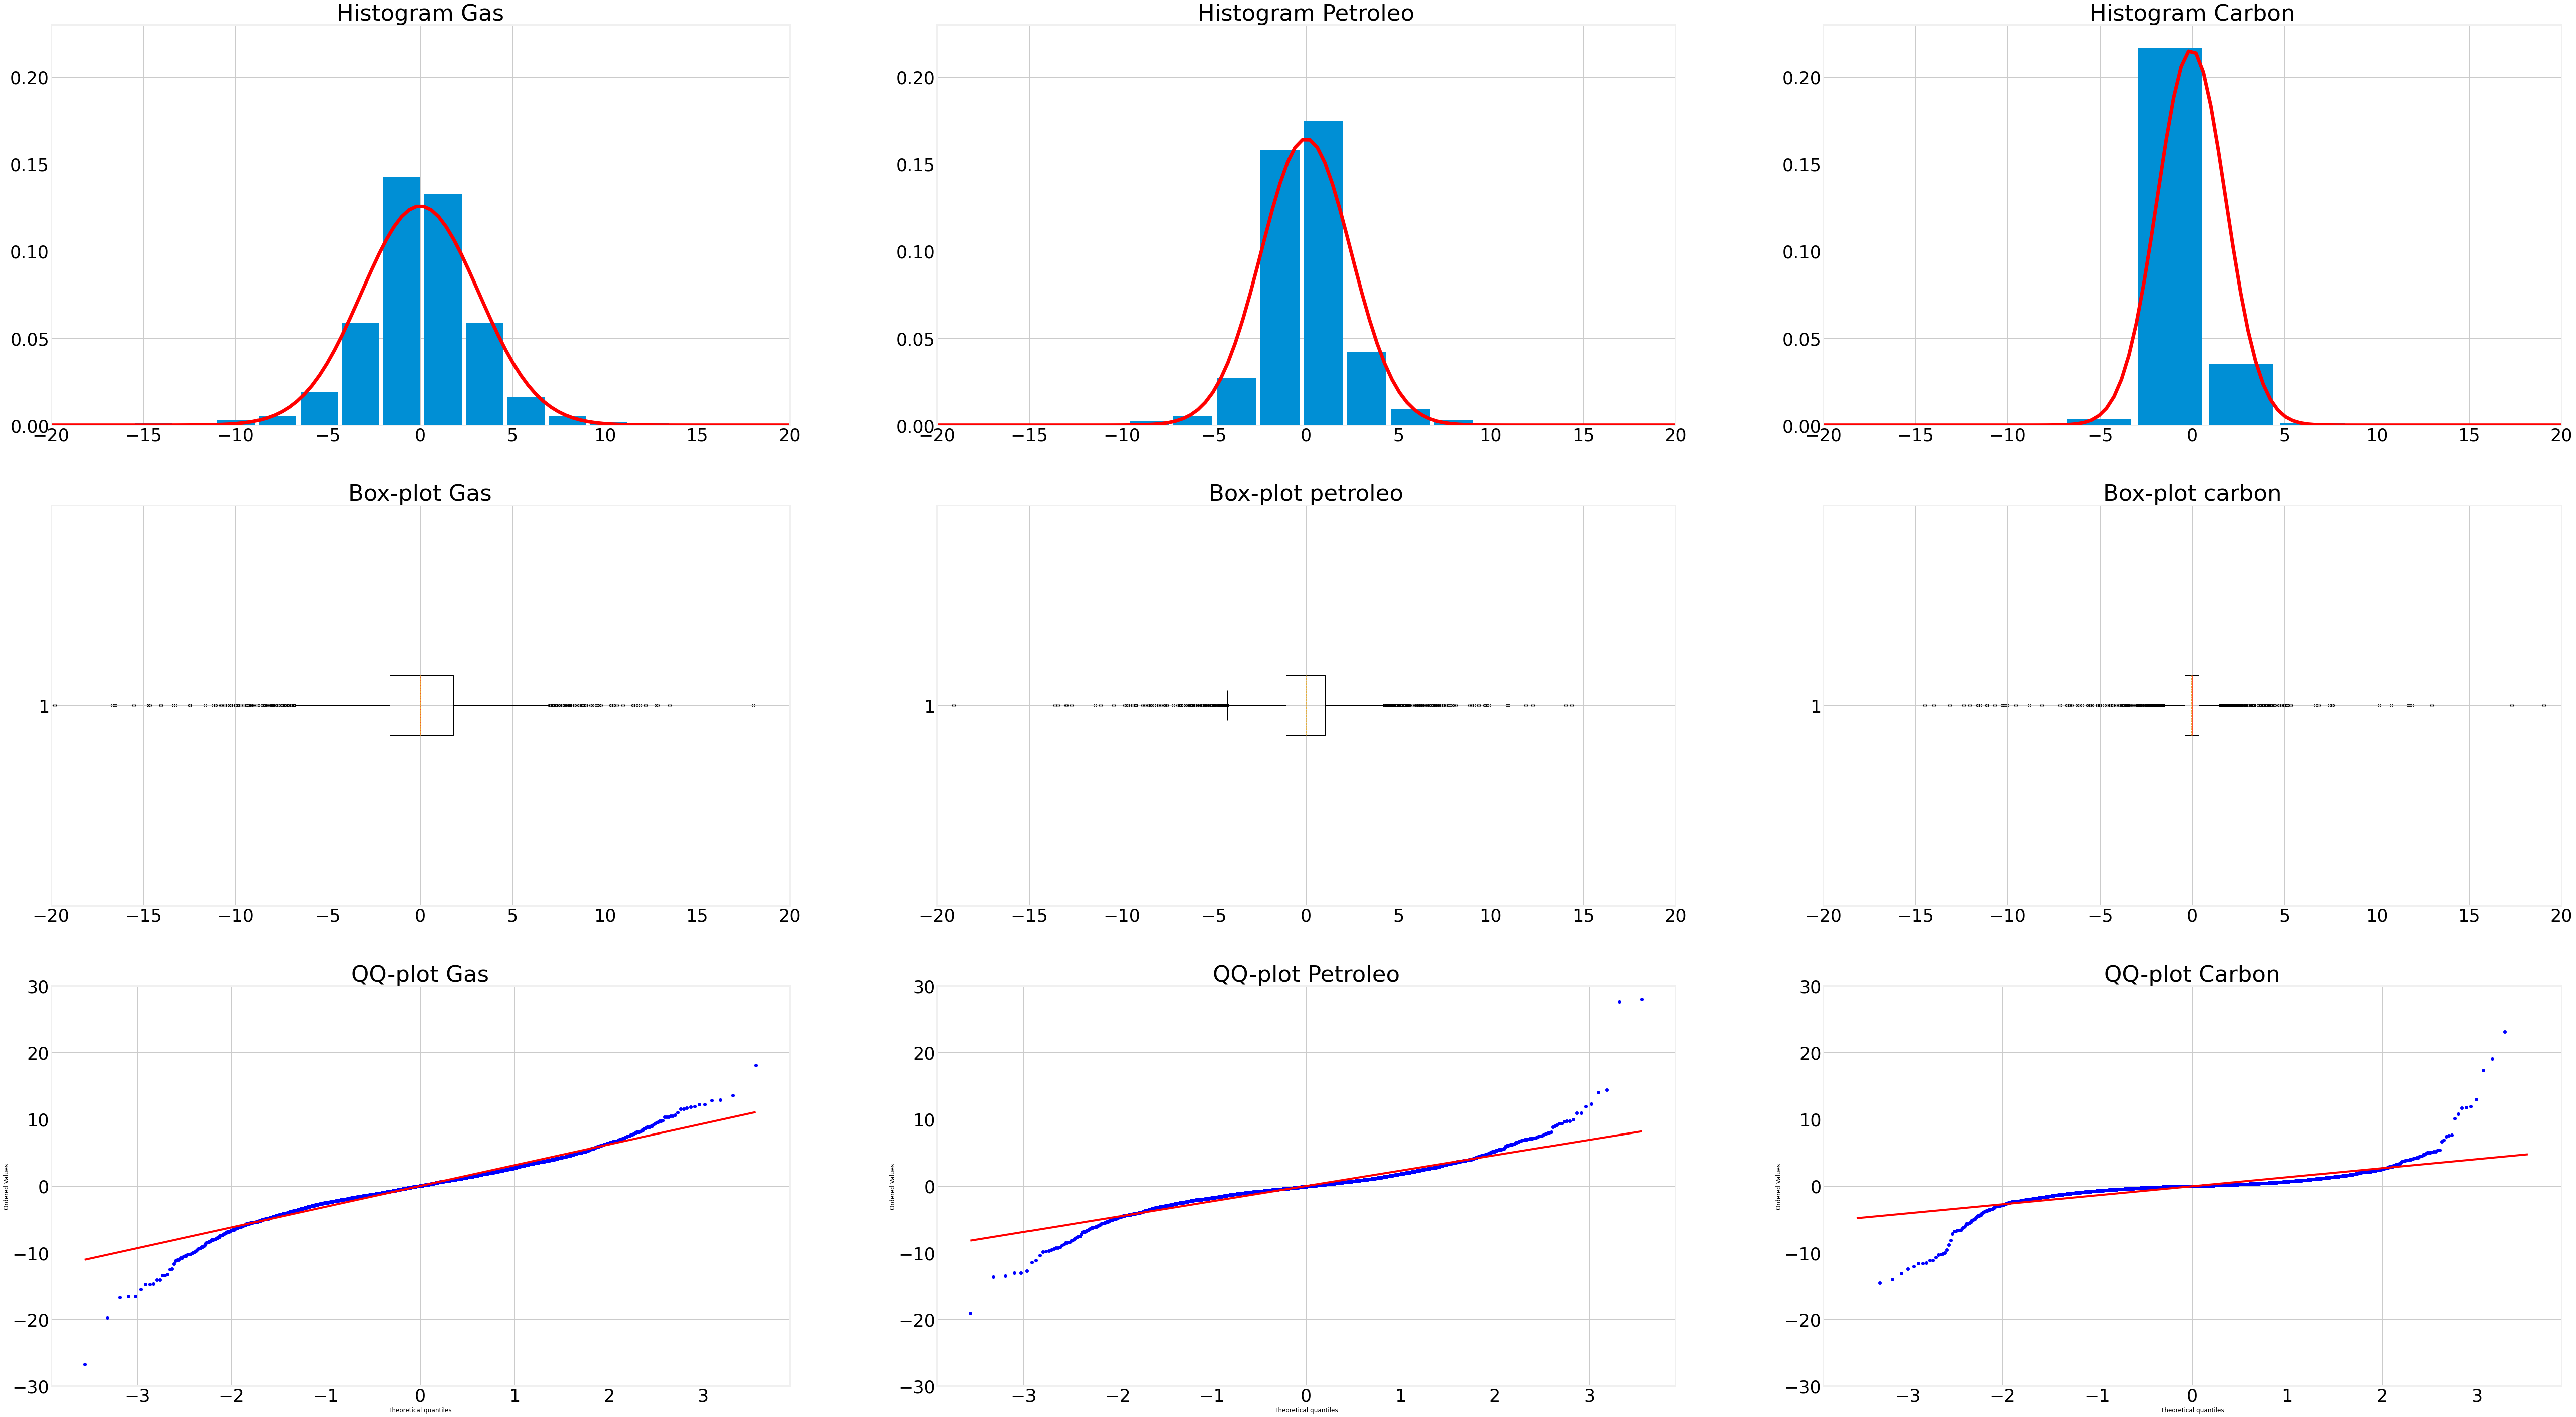

In [30]:
fig, ax = plt.subplots(figsize = (80, 50), nrows=3, ncols=3) 
# sharex=True mejor sin esta opcion casi
# plt.step([ax[0,0], ax[0,1],ax[0,2]], xlim=[-30,30])
##################### GAS ###########################
# BOX-PLOT
ax[1,0].boxplot(gas_return, vert=False, showmeans=True, meanline=True)
ax[1,0].set_title('Box-plot Gas', fontsize = 45)
ax[1,0].tick_params(axis='both', labelsize=35)
ax[1,0].set_facecolor('w')
ax[1,0].tick_params(axis='both', labelsize=35)
ax[1,0].set_xlim([-20, 20])
# HISTOGRAM
ax[0,0].hist(gas_return, 20, density=1, rwidth=0.9, align='mid', orientation='vertical')
ax[0,0].set_title('Histogram Gas', fontsize = 45)
addNorm(gas_return, ax[0,0])
ax[0,0].set_facecolor('w')
ax[0,0].tick_params(axis='both', labelsize=35)
ax[0,0].set_xlim([-20, 20])
ax[0,0].set_ylim([0, 0.23])
# QQ-PLOT
stats.probplot(gas_return, dist="norm", plot=ax[2,0])
ax[2,0].set_title('QQ-plot Gas', fontsize = 45)
ax[2,0].set_facecolor('w')
ax[2,0].tick_params(axis='both', labelsize=35)
ax[2,0].set_ylim([-30, 30])
##################### PETROLEO ###########################
# BOX-PLOT
ax[1,1].boxplot(petroleo_return, vert=False, showmeans=True, meanline=True)
ax[1,1].set_title('Box-plot petroleo', fontsize = 45)
ax[1,1].tick_params(axis='both', labelsize=35)
ax[1,1].set_facecolor('w')
ax[1,1].tick_params(axis='both', labelsize=35)
ax[1,1].set_xlim([-20, 20])
# HISTOGRAM
ax[0,1].hist(petroleo_return, 20, density=1, rwidth=0.9, align='mid', orientation='vertical')
ax[0,1].set_title('Histogram Petroleo', fontsize = 45)
addNorm(petroleo_return, ax[0,1])
ax[0,1].set_facecolor('w')
ax[0,1].tick_params(axis='both', labelsize=35)
ax[0,1].set_xlim([-20, 20])
ax[0,1].set_ylim([0, 0.23])
# QQ-PLOT
stats.probplot(petroleo_return, dist="norm", plot=ax[2,1])
ax[2,1].set_title('QQ-plot Petroleo', fontsize = 45)
ax[2,1].set_facecolor('w')
ax[2,1].tick_params(axis='both', labelsize=35)
ax[2,1].set_ylim([-30, 30])
##################### CARBON ###########################
# BOX-PLOT
# ax[1,2].boxplot(carbon_return, widths=7)
ax[1,2].boxplot(carbon_return, vert=False, showmeans=True, meanline=True)
ax[1,2].set_title('Box-plot carbon', fontsize = 45)
ax[1,2].tick_params(axis='both', labelsize=35)
ax[1,2].set_facecolor('w')
ax[1,2].tick_params(axis='both', labelsize=35)
ax[1,2].set_xlim([-20, 20])
# HISTOGRAM
ax[0,2].hist(carbon_return, 20, density=1, rwidth=0.9, align='mid', orientation='vertical')
ax[0,2].set_title('Histogram Carbon', fontsize = 45)
addNorm(carbon_return, ax[0,2])
ax[0,2].set_facecolor('w')
ax[0,2].tick_params(axis='both', labelsize=35)
ax[0,2].set_xlim([-20, 20])
ax[0,2].set_ylim([0, 0.23])
# QQ-PLOT
stats.probplot(carbon_return, dist="norm", plot=ax[2,2])
ax[2,2].set_title('QQ-plot Carbon', fontsize = 45)
ax[2,2].set_facecolor('w')
ax[2,2].tick_params(axis='both', labelsize=35)
ax[2,2].set_ylim([-30, 30])

# QQ-Plot

((array([-3.53637139, -3.29486869, -3.16143788, ...,  3.16143788,
          3.29486869,  3.53637139]),
  array([-34.05715364, -14.49086816, -14.01627513, ...,  19.05385299,
          23.06991513,  43.2453933 ])),
 (1.352284121232809, -0.04354989609203389, 0.7302265730557183))

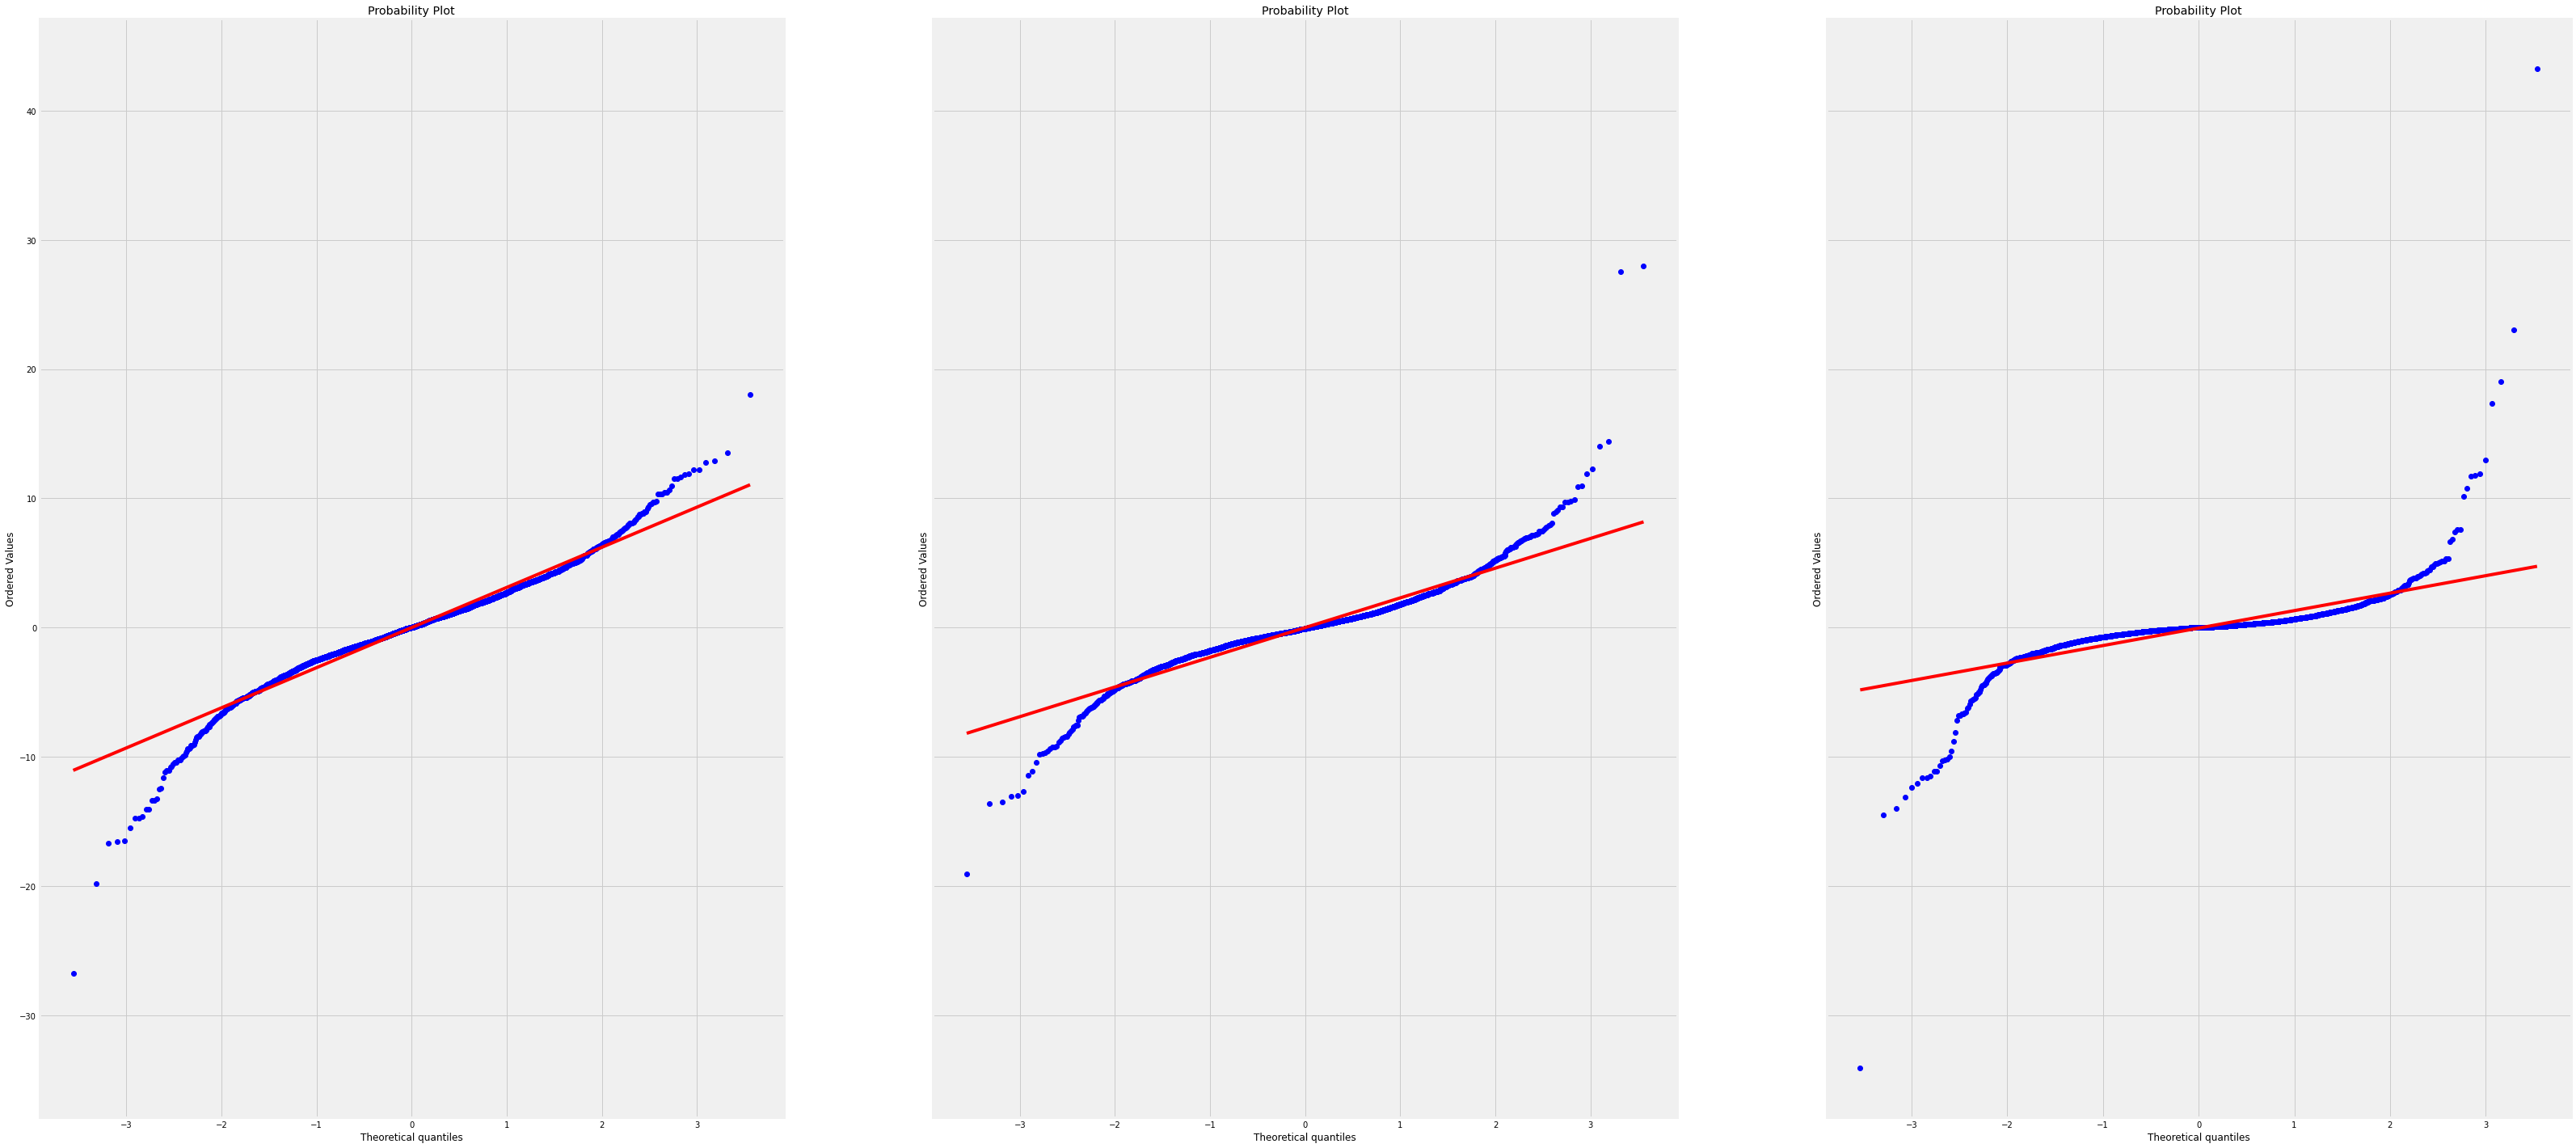

In [31]:
from turtle import width


fig, ax = plt.subplots(figsize = (50, 25), nrows=1, ncols=3, sharey=True)

##################### GAS ###########################
# QQ-PLOT
stats.probplot(gas_return, dist="norm", plot=ax[0])
##################### PETROLEO ###########################
# QQ-PLOT
stats.probplot(petroleo_return, dist="norm", plot=ax[1])
##################### CARBON ###########################
# QQ-PLOT
stats.probplot(carbon_return, dist="norm", plot=ax[2])

# Test de nornmalidad

In [32]:
stats.jarque_bera(gas_return)

Jarque_beraResult(statistic=3089.4489628664264, pvalue=0.0)

In [33]:
stats.jarque_bera(petroleo_return)

Jarque_beraResult(statistic=29762.467353597996, pvalue=0.0)

In [34]:
stats.jarque_bera(carbon_return)

Jarque_beraResult(statistic=2920155.34334657, pvalue=0.0)

In [35]:
stats.kstest(gas_return, 'norm')

KstestResult(statistic=0.21576120290327483, pvalue=1.411451367292655e-152)

In [36]:
stats.kstest(petroleo_return, 'norm')

KstestResult(statistic=0.1276150815756843, pvalue=2.0498474460690035e-53)

In [37]:
stats.kstest(carbon_return, 'norm')

KstestResult(statistic=0.1163581239665703, pvalue=9.206398437132024e-41)

## LJUNG-BOX

In [76]:
acorr_ljungbox(gas_return, lags=[10, 25, 50], return_df=True, boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
10,31.521114,0.000481,31.471098,0.000490
25,68.598935,0.000006,68.336228,0.000007
50,96.372274,0.000090,95.799562,0.000104


In [75]:
acorr_ljungbox(petroleo_return, lags=[10, 25, 50], return_df=True, boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
10,15.605396,0.111499,15.565025,0.112780
25,72.494990,0.000002,72.153433,0.000002
50,100.736863,0.000028,100.104068,0.000034


In [74]:
acorr_ljungbox(carbon_return, lags=[10, 25, 50], return_df=True, boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
10,27.395297,2.254290e-03,27.347647,2.293941e-03
25,115.844627,1.188733e-13,115.260799,1.503645e-13
50,157.256283,5.107975e-13,156.185608,7.426452e-13


## Correlogramas

(-0.3, 0.3)

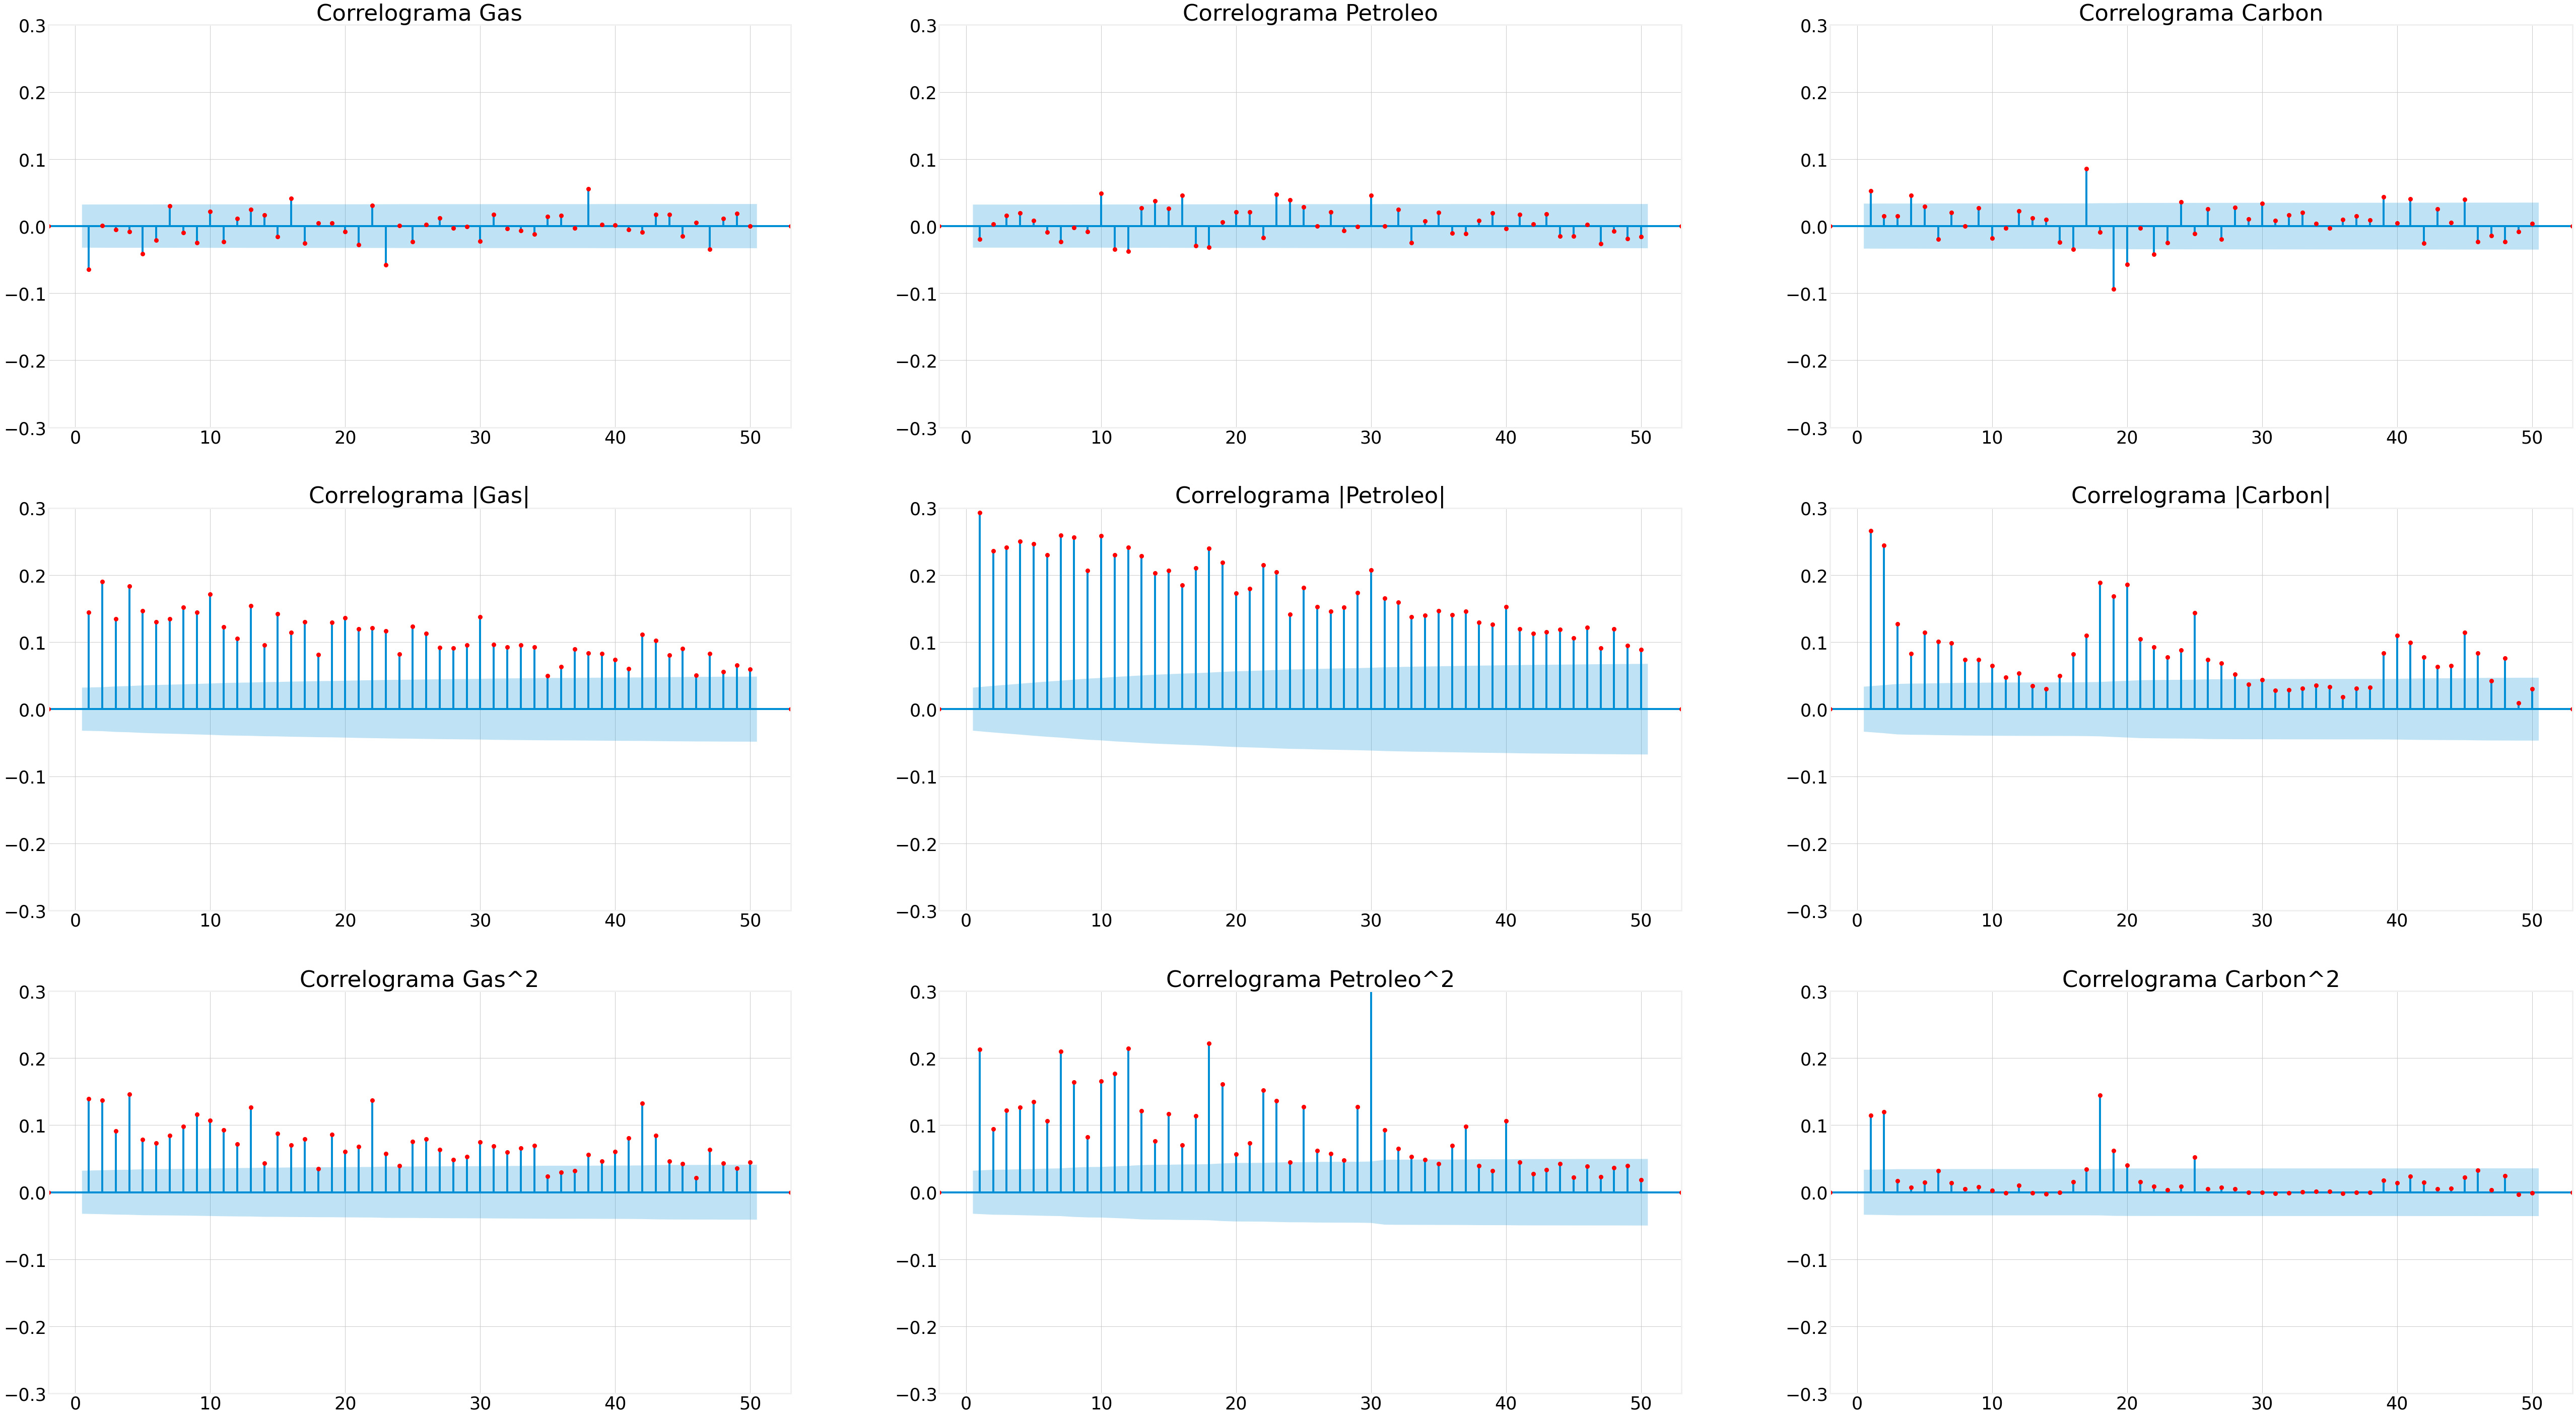

In [41]:
fig, ax = plt.subplots(figsize = (80, 50), nrows=3, ncols=3)
##################### GAS ###########################
# Correlograma 
sm.graphics.tsa.plot_acf(x=gas_return, ax=ax[0,0],lags=50, alpha=0.05, use_vlines=True, fft=False, zero=False, vlines_kwargs=None, markerfacecolor='r', markeredgecolor='r', markeredgewidth=1, markersize=8, marker='o')
ax[0,0].set_facecolor('w')
ax[0,0].tick_params(axis='both', labelsize=35)
ax[0,0].set_title('Correlograma Gas', fontsize = 45)
ax[0,0].set_ylim(-0.3, 0.3)
sm.graphics.tsa.plot_acf(x=np.absolute(gas_return), ax=ax[1,0],lags=50, title= 'Correlograma Petroleo Brent', alpha=0.05, use_vlines=True, fft=False, zero=False, vlines_kwargs=None, markerfacecolor='r', markeredgecolor='r', markeredgewidth=1, markersize=8, marker='o')
ax[1,0].set_facecolor('w')
ax[1,0].tick_params(axis='both', labelsize=35)
ax[1,0].set_title('Correlograma |Gas|', fontsize = 45)
ax[1,0].set_ylim(-0.3, 0.3)
sm.graphics.tsa.plot_acf(x=np.square(gas_return), ax=ax[2,0],lags=50, title= 'Correlograma Petroleo Brent', alpha=0.05, use_vlines=True, fft=False, zero=False, vlines_kwargs=None, markerfacecolor='r', markeredgecolor='r', markeredgewidth=1, markersize=8, marker='o')
ax[2,0].set_facecolor('w')
ax[2,0].tick_params(axis='both', labelsize=35)
ax[2,0].set_title('Correlograma Gas^2', fontsize = 45)
ax[2,0].set_ylim(-0.3, 0.3)
##################### PETROLEO ###########################
sm.graphics.tsa.plot_acf(x=petroleo_return, ax=ax[0,1],lags=50, title= 'Correlograma Petroleo Brent', alpha=0.05, use_vlines=True, fft=False, zero=False, vlines_kwargs=None, markerfacecolor='r', markeredgecolor='r', markeredgewidth=1, markersize=8, marker='o')
ax[0,1].set_facecolor('w')
ax[0,1].tick_params(axis='both', labelsize=35)
ax[0,1].set_title('Correlograma Petroleo', fontsize = 45)
ax[0,1].set_ylim(-0.3, 0.3)
sm.graphics.tsa.plot_acf(x=np.absolute(petroleo_return), ax=ax[1,1],lags=50, title= 'Correlograma Petroleo Brent', alpha=0.05, use_vlines=True, fft=False, zero=False, vlines_kwargs=None, markerfacecolor='r', markeredgecolor='r', markeredgewidth=1, markersize=8, marker='o')
ax[1,1].set_facecolor('w')
ax[1,1].tick_params(axis='both', labelsize=35)
ax[1,1].set_title('Correlograma |Petroleo|', fontsize = 45)
ax[1,1].set_ylim(-0.3, 0.3)
sm.graphics.tsa.plot_acf(x=np.square(petroleo_return), ax=ax[2,1],lags=50, title= 'Correlograma Petroleo Brent', alpha=0.05, use_vlines=True, fft=False, zero=False, vlines_kwargs=None, markerfacecolor='r', markeredgecolor='r', markeredgewidth=1, markersize=8, marker='o')
ax[2,1].set_facecolor('w')
ax[2,1].tick_params(axis='both', labelsize=35)
ax[2,1].set_title('Correlograma Petroleo^2', fontsize = 45)
ax[2,1].set_ylim(-0.3, 0.3)
##################### CARBON ###########################
sm.graphics.tsa.plot_acf(x=carbon_return, ax=ax[0,2],lags=50, title= 'Correlograma Petroleo Brent', alpha=0.05, use_vlines=True, fft=False, zero=False, vlines_kwargs=None, markerfacecolor='r', markeredgecolor='r', markeredgewidth=1, markersize=8, marker='o')
ax[0,2].set_facecolor('w')
ax[0,2].tick_params(axis='both', labelsize=35)
ax[0,2].set_title('Correlograma Carbon', fontsize = 45)
ax[0,2].set_ylim(-0.3, 0.3)
sm.graphics.tsa.plot_acf(x=np.absolute(carbon_return), ax=ax[1,2],lags=50, title= 'Correlograma Petroleo Brent', alpha=0.05, use_vlines=True, fft=False, zero=False, vlines_kwargs=None, markerfacecolor='r', markeredgecolor='r', markeredgewidth=1, markersize=8, marker='o')
ax[1,2].set_facecolor('w')
ax[1,2].tick_params(axis='both', labelsize=35)
ax[1,2].set_title('Correlograma |Carbon|', fontsize = 45)
ax[1,2].set_ylim(-0.3, 0.3)
sm.graphics.tsa.plot_acf(x=np.square(carbon_return), ax=ax[2,2],lags=50, title= 'Correlograma Petroleo Brent', alpha=0.05, use_vlines=True, fft=False, zero=False, vlines_kwargs=None, markerfacecolor='r', markeredgecolor='r', markeredgewidth=1, markersize=8, marker='o')
ax[2,2].set_facecolor('w')
ax[2,2].tick_params(axis='both', labelsize=35)
ax[2,2].set_title('Correlograma Carbon^2', fontsize = 45)
ax[2,2].set_ylim(-0.3, 0.3)

## Comprobando que esto hace lo mismo...

Como podemos ver, esta función hace lo mismo que si lo planteamos a pedal :)


In [42]:
def autocorrelation_function(x, lag):
    '''
    This function calculates the autocorrelation function of a time series
    '''
    n = len(x)
    mean = np.mean(x)
    numerator = np.sum((x[0:n-lag] - mean) * (x[lag:n] - mean))
    denominator = np.sum((x - mean)**2)
    return numerator/denominator

(-0.06, 0.06)

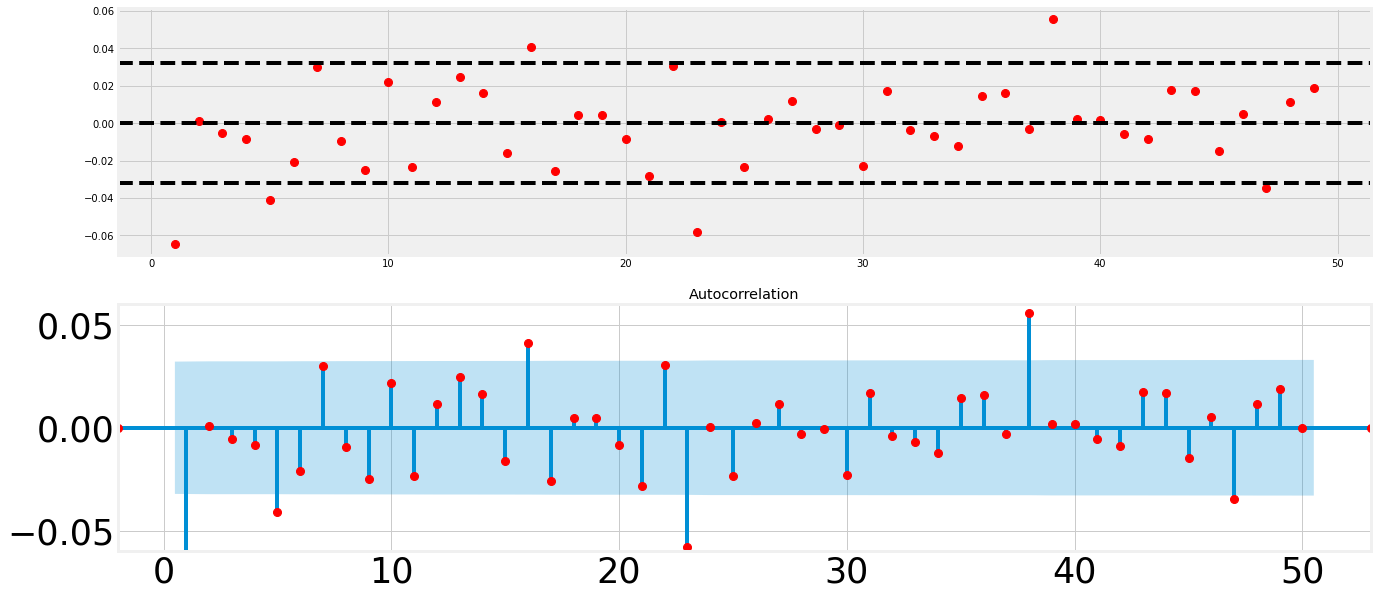

In [43]:
fig, ax = plt.subplots(2,1, figsize=(20,10))
def plot_autocorrelation_function(x, lags):
  ''' 
  This function plots the autocorrelation function of a time series and 95% confidence interval
  '''
  autocorrelation = [autocorrelation_function(x, lag) for lag in range(1,lags)]
  ax[0].plot(range(1,lags), autocorrelation, marker='o', color='r', linestyle='', markersize=8,)
  ax[0].axhline(y=0, linestyle='--', color='k')
  ax[0].axhline(y=1.96/np.sqrt(len(x)), linestyle='--', color='k')
  ax[0].axhline(y=-1.96/np.sqrt(len(x)), linestyle='--', color='k')
plot_autocorrelation_function(gas_return, 50)

sm.graphics.tsa.plot_acf(x=gas_return, ax=ax[1],lags=50, alpha=0.05, use_vlines=True, fft=False, zero=False, vlines_kwargs=None, markerfacecolor='r', markeredgecolor='r', markeredgewidth=1, markersize=8, marker='o')
ax[1].set_facecolor('w')
ax[1].tick_params(axis='both', labelsize=35)
ax[1].set_ylim(-0.06, 0.06)

# Taylor Effect

In [44]:
def transform(x, exp):
    x = np.absolute(x)
    array = np.empty(len(x))
    for i, value in enumerate(x):
       array[i] = value**exp
    return array

In [45]:
def lagging(x, lag):
    return x[:-(lag+1)], x[lag:-1]

In [46]:
def plot_max(x, y ,ax):
  '''
  Plot a a line from the abscissa axis to the maximum of the function
  '''
  maxy = np.nanmax(y)
  maxx = x[np.where(y == maxy)]
  ax.plot([maxx, maxx], [0, maxy], color='red', linestyle='--', linewidth=1)
  ax.plot(maxx, maxy, 'o', color='red', markersize=10)



(0.0, 0.3)

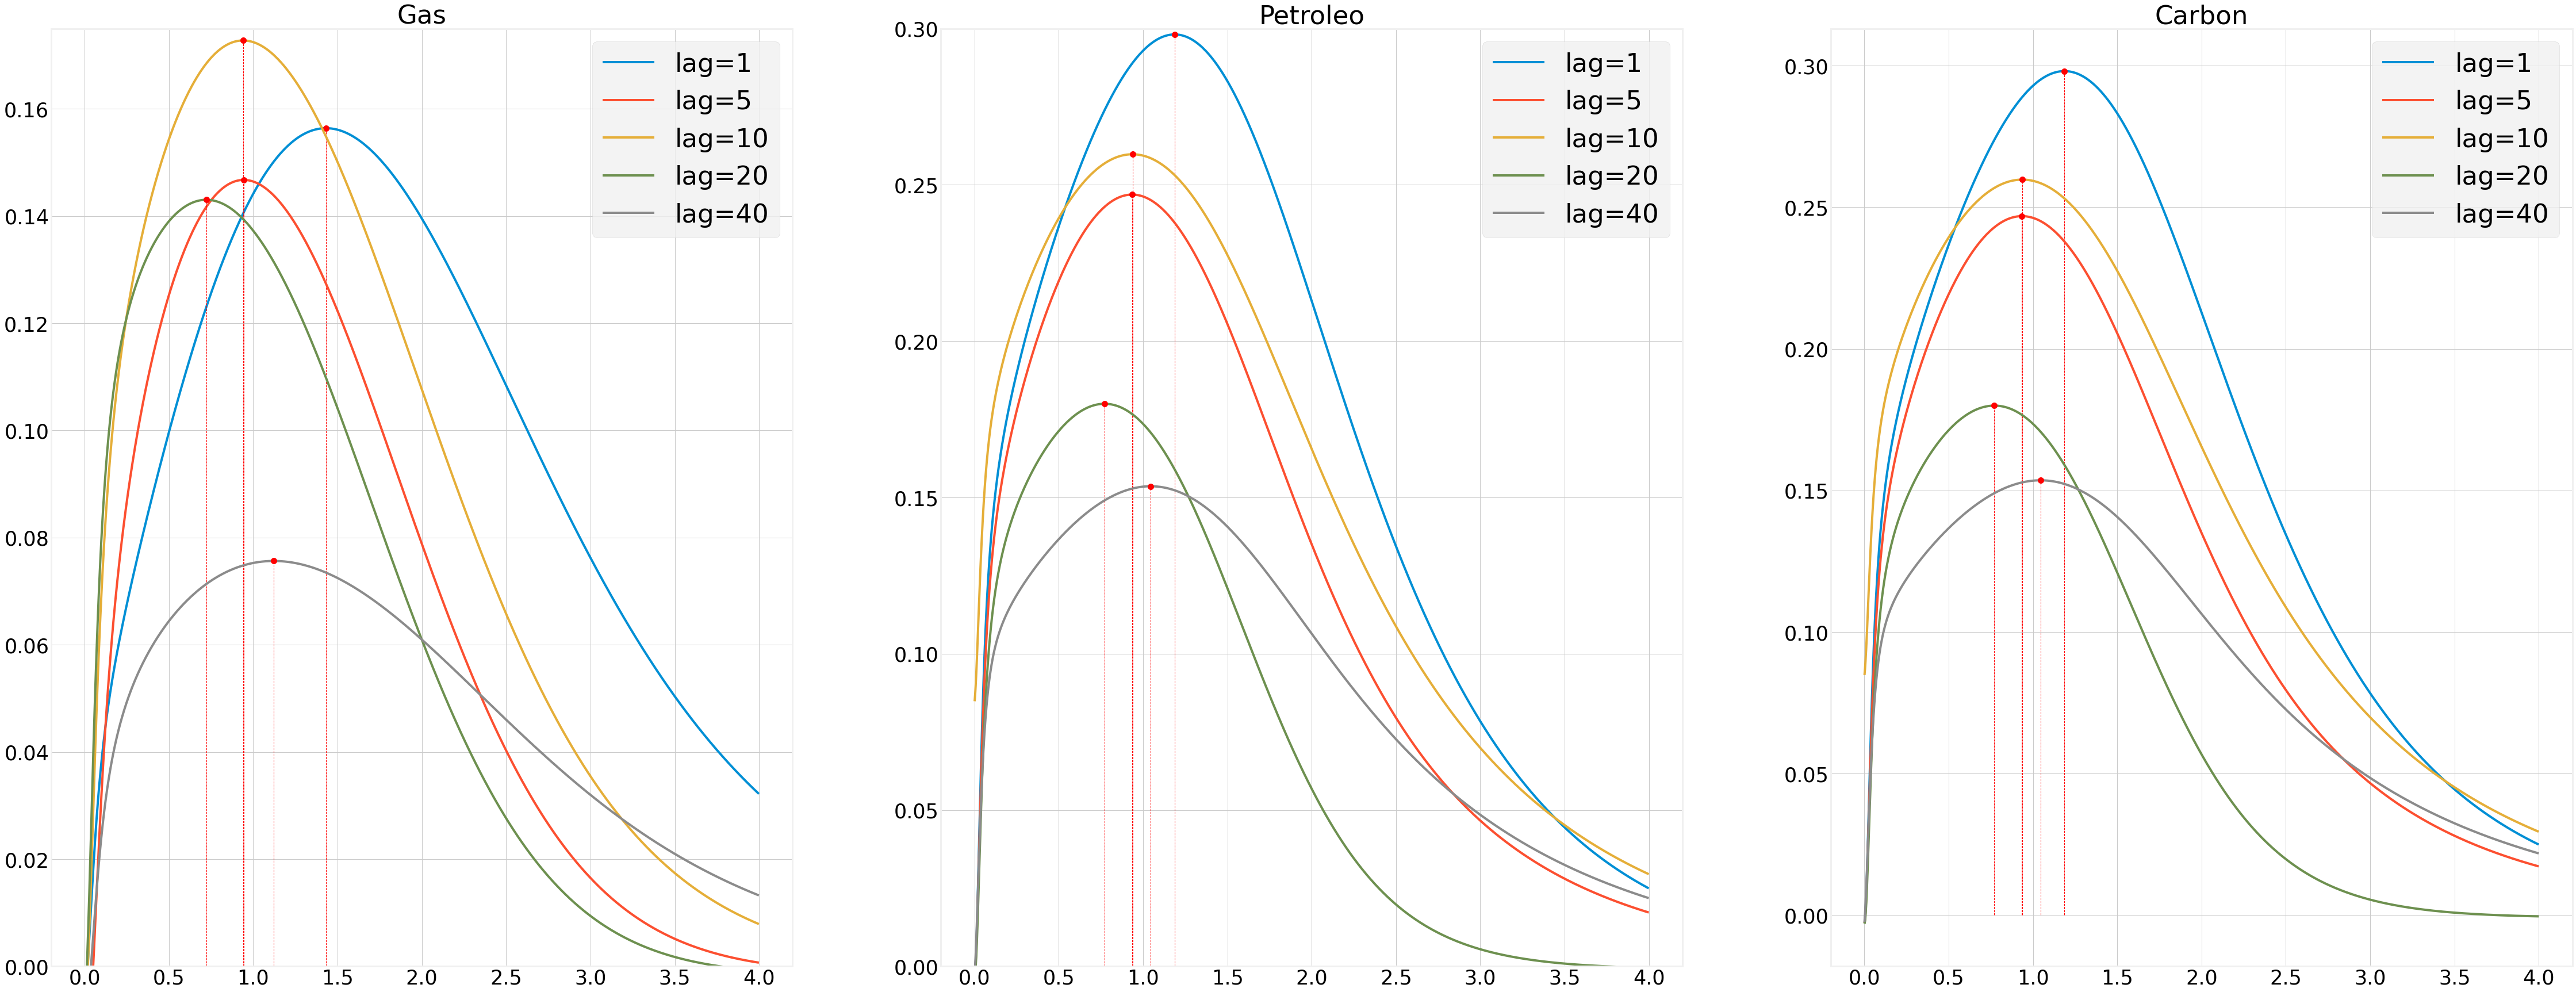

In [78]:
fig, ax = plt.subplots(figsize = (70, 30), nrows=1, ncols=3)

# GAS ######################################################
array = np.empty(4000)
aX = np.arange(4000)/1000
for a in [1, 5, 10, 20, 40]:
    for b in np.arange(0,4000):
        proc = transform(gas_return, b/1000)
        x,y = lagging(proc, a)
        array[b], _ = stats.pearsonr(x, y)
    ax[0].plot(aX, array, label='lag={0}'.format(a))
    ax[0].legend(prop={'size': 45})
    plot_max(aX, array, ax[0])
ax[0].set_title('Gas', fontsize = 45)
ax[0].set_facecolor('w')
ax[0].tick_params(axis='both', labelsize=35)
ax[0].set_ylim(0, .175)
# PETROLEO ###################################################
array = np.empty(4000)
aX = np.arange(4000)/1000
for a in [1, 5, 10, 20, 40]:
    for b in np.arange(0,4000):
        proc = transform(petroleo_return, b/1000)
        x,y = lagging(proc, a)
        array[b], _ = stats.pearsonr(x, y)
    ax[1].plot(aX, array, label='lag={0}'.format(a))
    ax[1].legend(prop={'size': 45})
    plot_max(aX, array, ax[1])
ax[1].set_title('Petroleo', fontsize = 45)
ax[1].set_facecolor('w')
ax[1].tick_params(axis='both', labelsize=35)
ax[1].set_ylim(0, .3)
# CARBON #####################################################
array = np.empty(4000)
aX = np.arange(4000)/1000
for a in [1, 5, 10, 20, 40]:
    for b in np.arange(0,4000):
        proc = transform(petroleo_return, b/1000)
        x,y = lagging(proc, a)
        array[b], _ = stats.pearsonr(x, y)
    ax[2].plot(aX, array, label='lag={0}'.format(a))
    ax[2].legend(prop={'size': 45})
    plot_max(aX, array, ax[2])
ax[2].set_title('Carbon', fontsize = 45)
ax[2].set_facecolor('w')
ax[2].tick_params(axis='both', labelsize=35)
ax[1].set_ylim(0, .3)

# Leverage Effect

(0.0, 50.0)

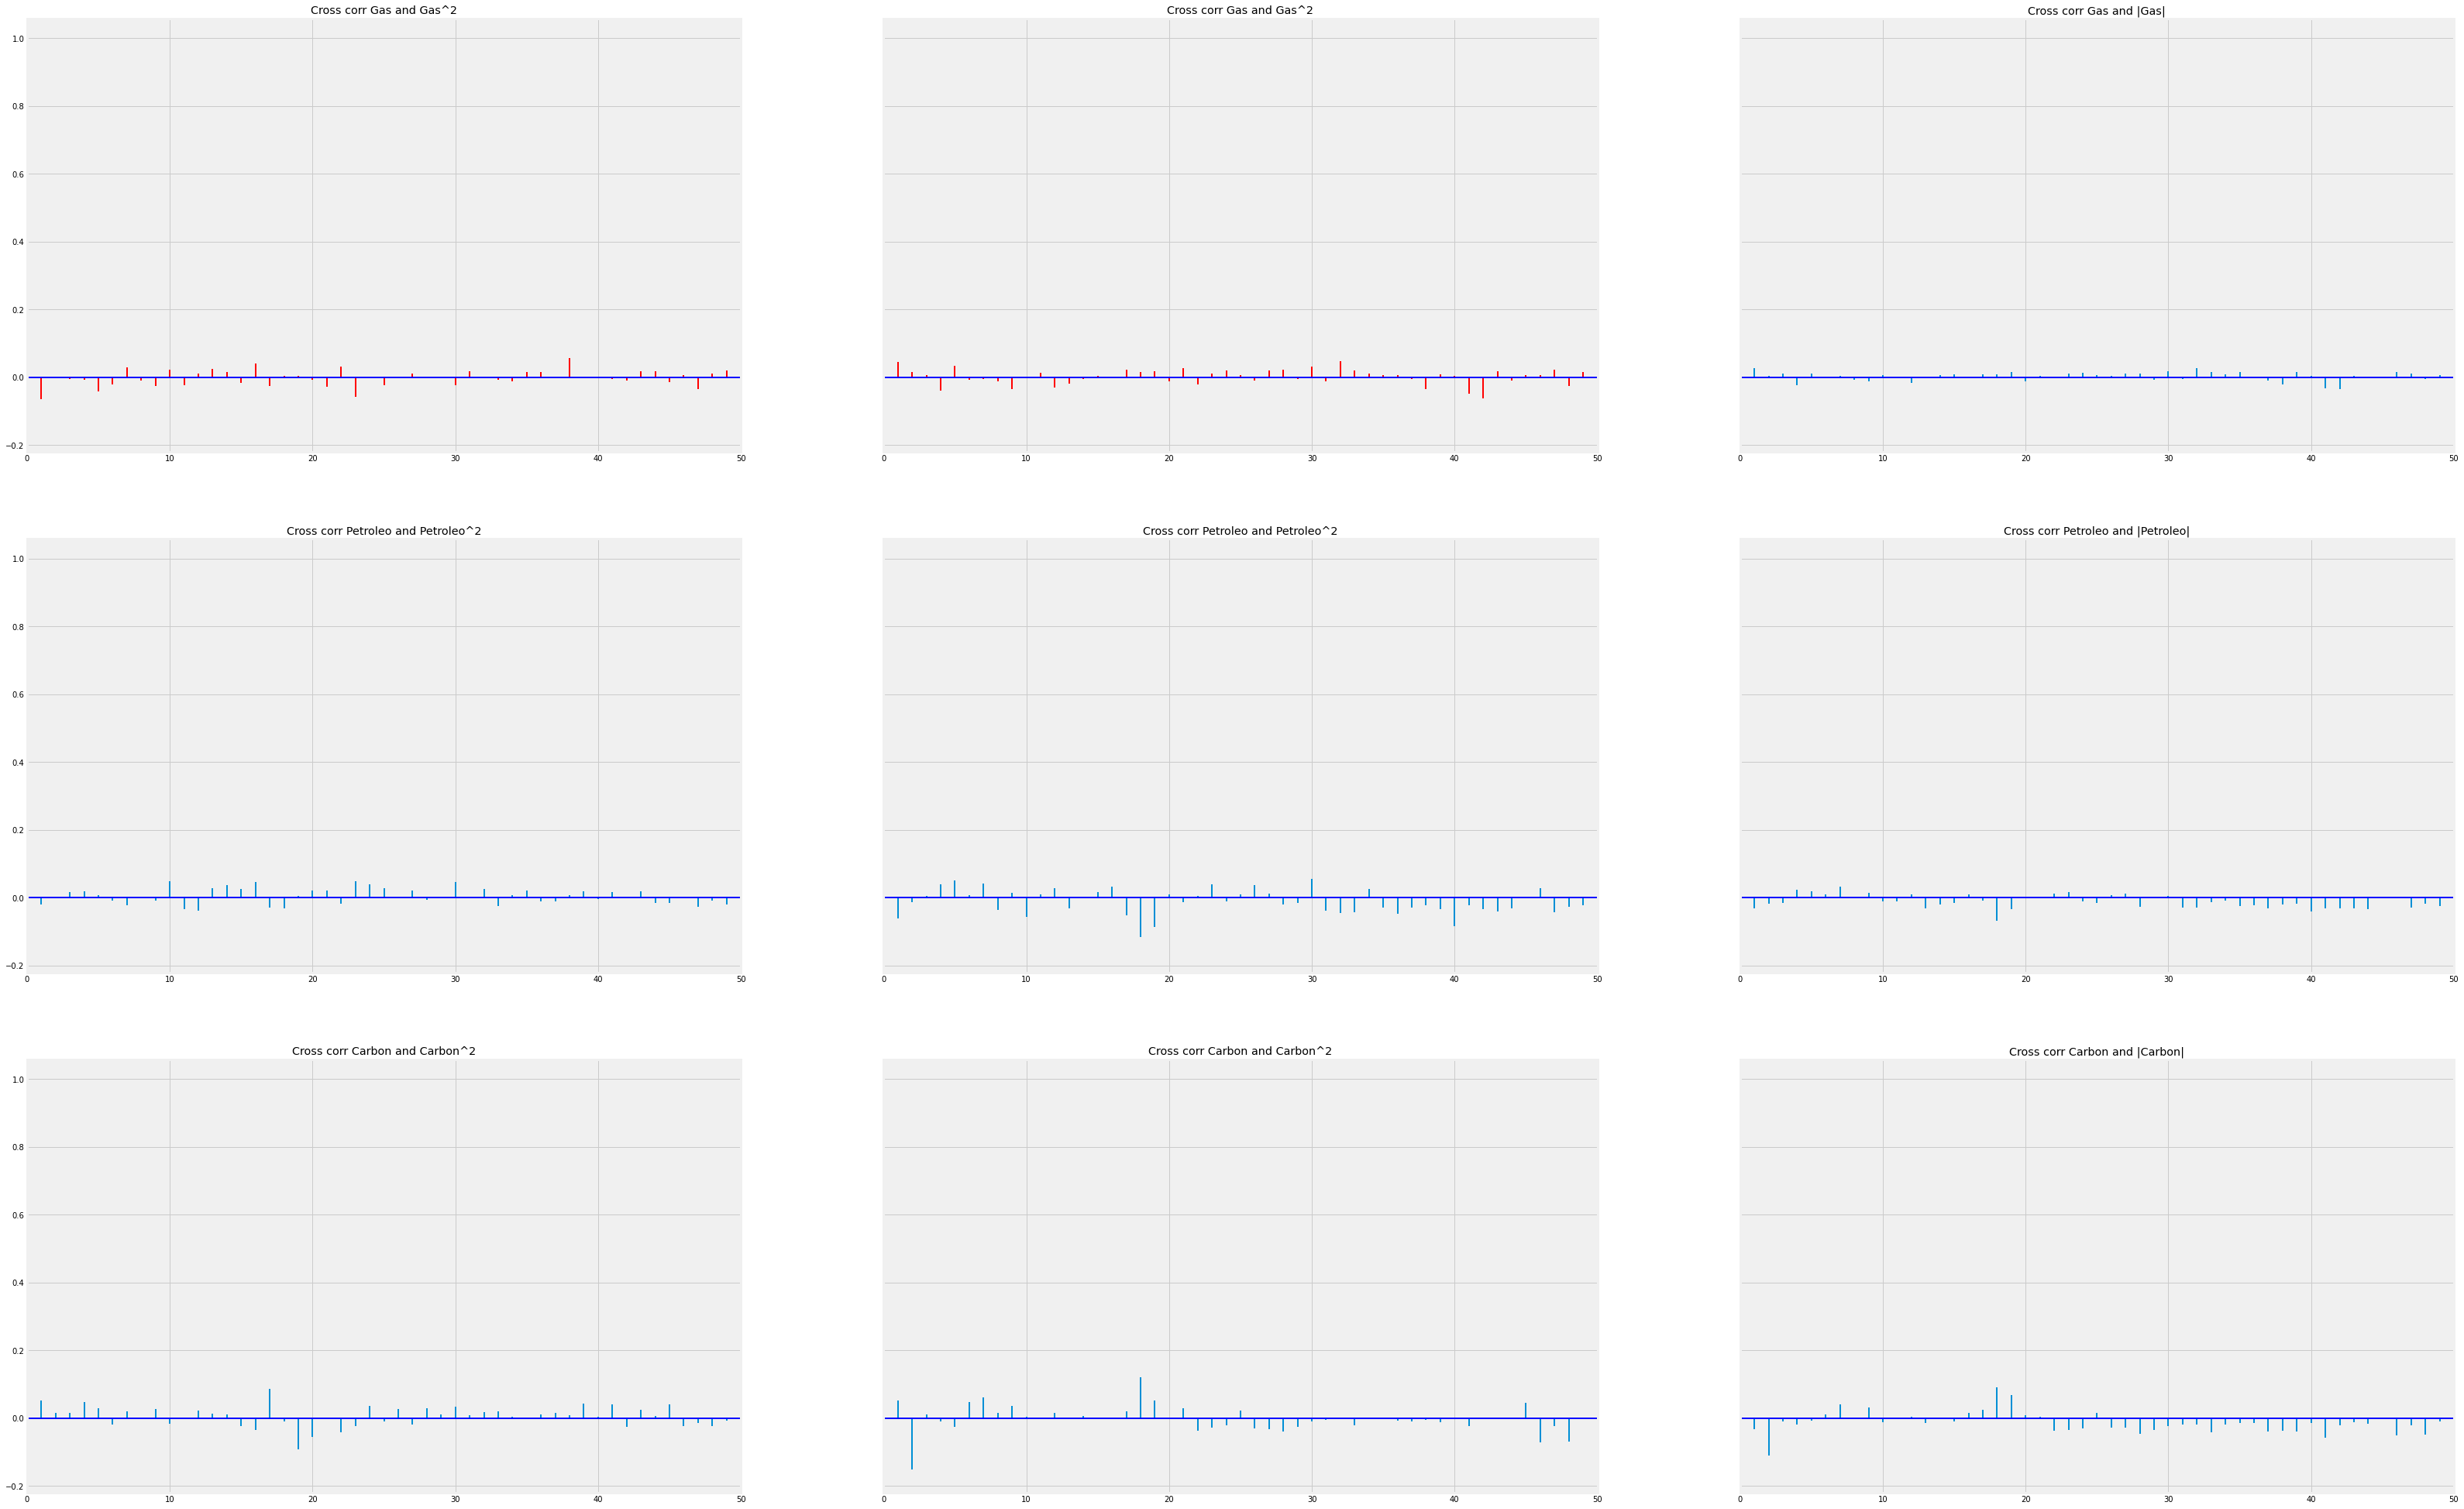

In [48]:
fig, ax = plt.subplots(figsize = (50, 35), nrows=3, ncols=3, sharey=True)

# GAS ########################################################
ax[0,0].xcorr(gas_return, gas_return, usevlines=True, maxlags=50, normed=True, lw=2, label='Gas^2', color='red')
ax[0,0].axhline(0, color='blue', lw=2) 
ax[0,0].set_title('Cross corr Gas and Gas^2')
ax[0,0].set_xlim([0,50])

ax[0,1].xcorr(gas_return, np.square(gas_return), usevlines=True, maxlags=50, normed=True, lw=2, label='Gas^2', color='red')
ax[0,1].axhline(0, color='blue', lw=2) 
ax[0,1].set_title('Cross corr Gas and Gas^2')
ax[0,1].set_xlim([0,50])

ax[0,2].xcorr(gas_return, np.absolute(gas_return), maxlags=50, normed=True, lw=2) 
ax[0,2].axhline(0, color='blue', lw=2) 
ax[0,2].set_title('Cross corr Gas and |Gas|')
ax[0,2].set_xlim([0,50])
# PETROLEO ###################################################
ax[1,0].xcorr(petroleo_return, petroleo_return, usevlines=True, maxlags=50, normed=True, lw=2) 
ax[1,0].axhline(0, color='blue', lw=2) 
ax[1,0].set_title('Cross corr Petroleo and Petroleo^2')
ax[1,0].set_xlim([0,50])

ax[1,1].xcorr(petroleo_return, np.square(petroleo_return), usevlines=True, maxlags=50, normed=True, lw=2) 
ax[1,1].axhline(0, color='blue', lw=2) 
ax[1,1].set_title('Cross corr Petroleo and Petroleo^2')
ax[1,1].set_xlim([0,50])

ax[1,2].xcorr(petroleo_return, np.absolute(petroleo_return), usevlines=True, maxlags=50, normed=True, lw=2) 
ax[1,2].axhline(0, color='blue', lw=2) 
ax[1,2].set_title('Cross corr Petroleo and |Petroleo|')
ax[1,2].set_xlim([0,50])
# CARBON #####################################################
ax[2,0].xcorr(carbon_return, carbon_return, usevlines=True, maxlags=50, normed=True, lw=2) 
ax[2,0].axhline(0, color='blue', lw=2)
ax[2,0].set_title('Cross corr Carbon and Carbon^2')
ax[2,0].set_xlim([0,50])

ax[2,1].xcorr(carbon_return, np.square(carbon_return), usevlines=True, maxlags=50, normed=True, lw=2) 
ax[2,1].axhline(0, color='blue', lw=2)
ax[2,1].set_title('Cross corr Carbon and Carbon^2')
ax[2,1].set_xlim([0,50])

ax[2,2].xcorr(carbon_return, np.absolute(carbon_return), usevlines=True, maxlags=50, normed=True, lw=2) 
ax[2,2].axhline(0, color='blue', lw=2)
ax[2,2].set_title('Cross corr Carbon and |Carbon|')
ax[2,2].set_xlim([0,50])

In [49]:
def cross_corr(x, y, lag):
  '''
  This function return the cross correlation function between two time series and lag
  '''
  x = x - np.mean(x)
  y = y - np.mean(y)
  return np.sum(x[:-lag]*y[lag:])/np.sqrt(np.sum(x**2)*np.sum(y**2))

In [50]:
cross_corr(gas_return, gas_return, 50).size
cross_corr(gas_return, gas_return, 50)

-0.00016915203094447633

In [51]:
def add_vertical_line(ax, x, y):
  '''
  This function plot a vertical line from the bottom to y
  '''
  ax.plot([x, x], [0, y], '-', lw=2, color='b')

In [52]:
def plot_cross_corr(x, y, ax):
  '''
  This function plot the cross_corr between x and y and the 95% confidence interval
  '''
  ax.set_xlim([0,50])
  ax.set_title('Cross corr Gas and Gas^2')
  ax.axhline(0, color='blue', lw=2)
  ax.plot(np.arange(1,50), [cross_corr(x, y, i) for i in np.arange(1,50)], lw=2, color='red', linestyle="", marker="o", markersize=8)
  for i in np.arange(1,50):
    add_vertical_line(ax, i, cross_corr(x, y, i))
  ax.set_facecolor('w')
  ax.fill_between(np.arange(1,50), 1.96/np.sqrt(len(x)), -1.96/np.sqrt(len(x)), color='skyblue', alpha=0.2)
  ax.tick_params(axis='both', labelsize=35)

(-0.15, 0.15)

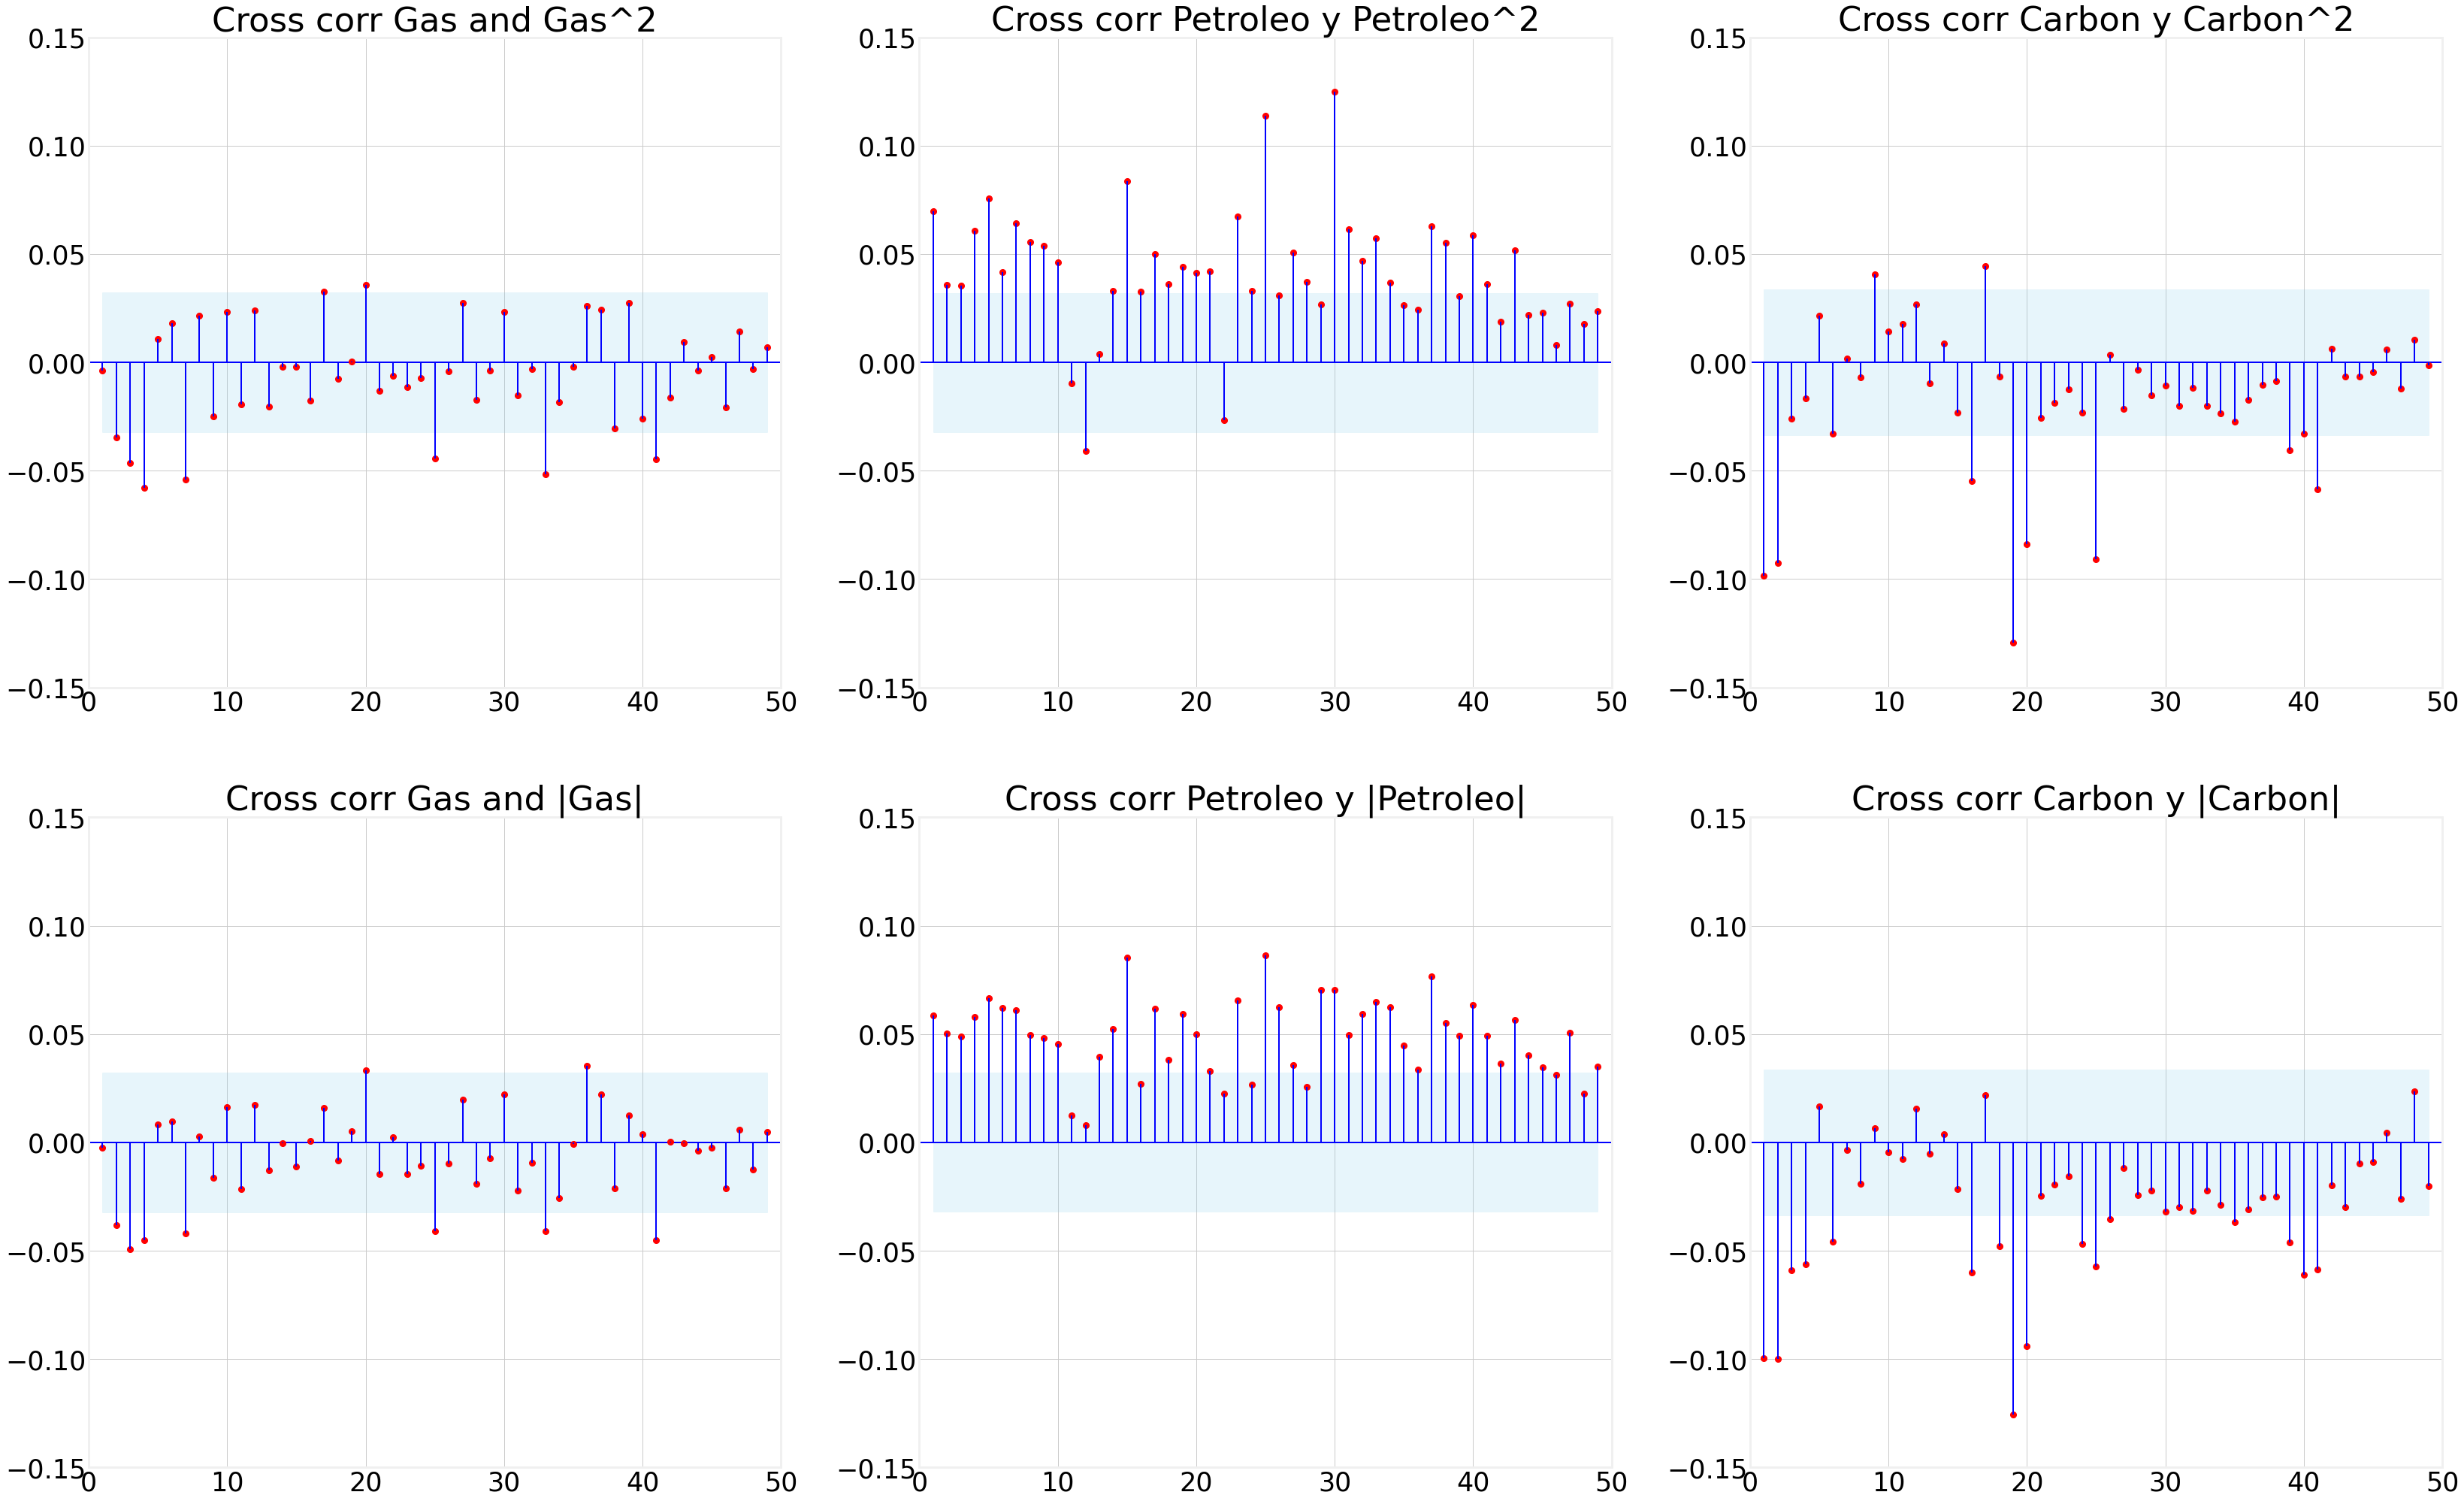

In [79]:
fig, ax = plt.subplots(figsize = (50, 35), nrows=2, ncols=3)

# GAS ########################################################
plot_cross_corr(gas_return, np.square(gas_return), ax[0,0])
ax[0,0].set_title('Cross corr Gas and Gas^2', fontsize = 45)
ax[0,0].tick_params(axis='both', labelsize=35)
ax[0,0].set_ylim([-0.15, 0.15])
plot_cross_corr(gas_return, np.absolute(gas_return), ax[1,0])
ax[1,0].set_title('Cross corr Gas and |Gas|', fontsize = 45)
ax[1,0].tick_params(axis='both', labelsize=35)
ax[1,0].set_ylim([-0.15, 0.15])

# PETROLEO ###################################################
plot_cross_corr(petroleo_return, np.square(petroleo_return), ax[0,1])
ax[0,1].set_title('Cross corr Petroleo y Petroleo^2', fontsize = 45)
ax[0,1].tick_params(axis='both', labelsize=35)
ax[0,1].set_ylim([-0.15, 0.15])
plot_cross_corr(petroleo_return, np.absolute(petroleo_return), ax[1,1])
ax[1,1].set_title('Cross corr Petroleo y |Petroleo|', fontsize = 45)
ax[1,1].tick_params(axis='both', labelsize=35)
ax[1,1].set_ylim([-0.15, 0.15])

# CARBON ######################################################
plot_cross_corr(carbon_return, np.square(carbon_return), ax[0,2])
ax[0,2].set_title('Cross corr Carbon y Carbon^2', fontsize = 45)
ax[0,2].tick_params(axis='both', labelsize=35)
ax[0,2].set_ylim([-0.15, 0.15])
plot_cross_corr(carbon_return, np.absolute(carbon_return), ax[1,2])
ax[1,2].set_title('Cross corr Carbon y |Carbon|', fontsize = 45)
ax[1,2].tick_params(axis='both', labelsize=35)
ax[1,2].set_ylim([-0.15, 0.15])

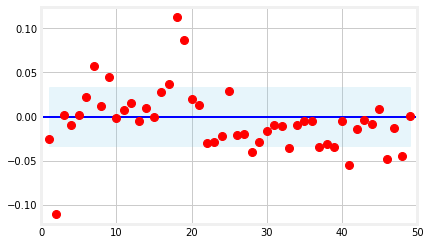

In [54]:
def plot_ccf(x, y, ax):
  '''
  This function plot the cross correlation using statmodels ccf() function
  '''
  ax.set_xlim([0,50])
  ax.axhline(0, color='blue', lw=2)
  ax.plot(np.arange(1,50), sm.tsa.stattools.ccf(x, y)[1:50], lw=2, color='red', linestyle="", marker="o", markersize=8)
  ax.set_facecolor('w')
  ax.fill_between(np.arange(1,50), 1.96/np.sqrt(len(x)), -1.96/np.sqrt(len(x)), color='skyblue', alpha=0.2)

fig, ax = plt.subplots()
plot_ccf(carbon_return, np.absolute(carbon_return), ax)

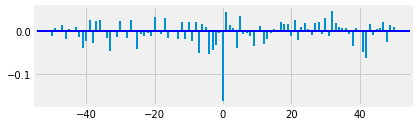

In [55]:
fig = plt.figure() 
ax1 = fig.add_subplot(211) 
  
ax1.xcorr(gas_return, np.square(gas_return), usevlines=True, maxlags=50, normed=True, lw=2) 
# ax1.grid(True) 
ax1.axhline(0, color='blue', lw=2) 
  
plt.show() 

## Robust Correlations

In [56]:
def standar_deviation(x):
  '''
  This function return the standar deviation of x
  '''
  return np.sqrt(np.sum((x - np.mean(x))**2)/len(x))
standar_deviation(gas_return)

3.171770183539338

In [57]:
def ramsay_weights(x):
  '''
  This function return the Ramsay weights
  '''
  return np.exp(-0.3*np.absolute(x-np.mean(x))/standar_deviation(x))

### Estimador robusto autocorrelation

In [58]:
def robust_autocorrelation (x, lag):
  '''
  This function return the robust autocorrelation
  '''
  weight = ramsay_weights(x)
  xmean = np.sum(x*weight)/np.sum(weight)
  x = x - xmean
  numerator = np.sum(x[:-lag]*x[lag:]*weight[:-lag]*weight[lag:])
  denominator = np.sum(weight[:-lag]*weight[lag:])
  return numerator/denominator

In [59]:
def plot_robust_autocorrelation(x, ax, title):
  '''
  This function plot the cross_corr between x and y and the 95% confidence interval
  '''
  ax.set_xlim([0,50])
  ax.set_ylim([-.35,.35])
  ax.set_title(title)
  ax.axhline(0, color='blue', lw=2)
  ax.plot(np.arange(1,50), [robust_autocorrelation(x, i) for i in np.arange(1,50)], lw=2, color='red', linestyle="", marker="o")
  for i in np.arange(1,50):
    add_vertical_line(ax, i, robust_autocorrelation(x, i))
  ax.set_facecolor('w')
  ax.fill_between(np.arange(1,50), 1.96/np.sqrt(len(x)), -1.96/np.sqrt(len(x)), color='skyblue', alpha=0.2)
  ax.tick_params(axis='both')

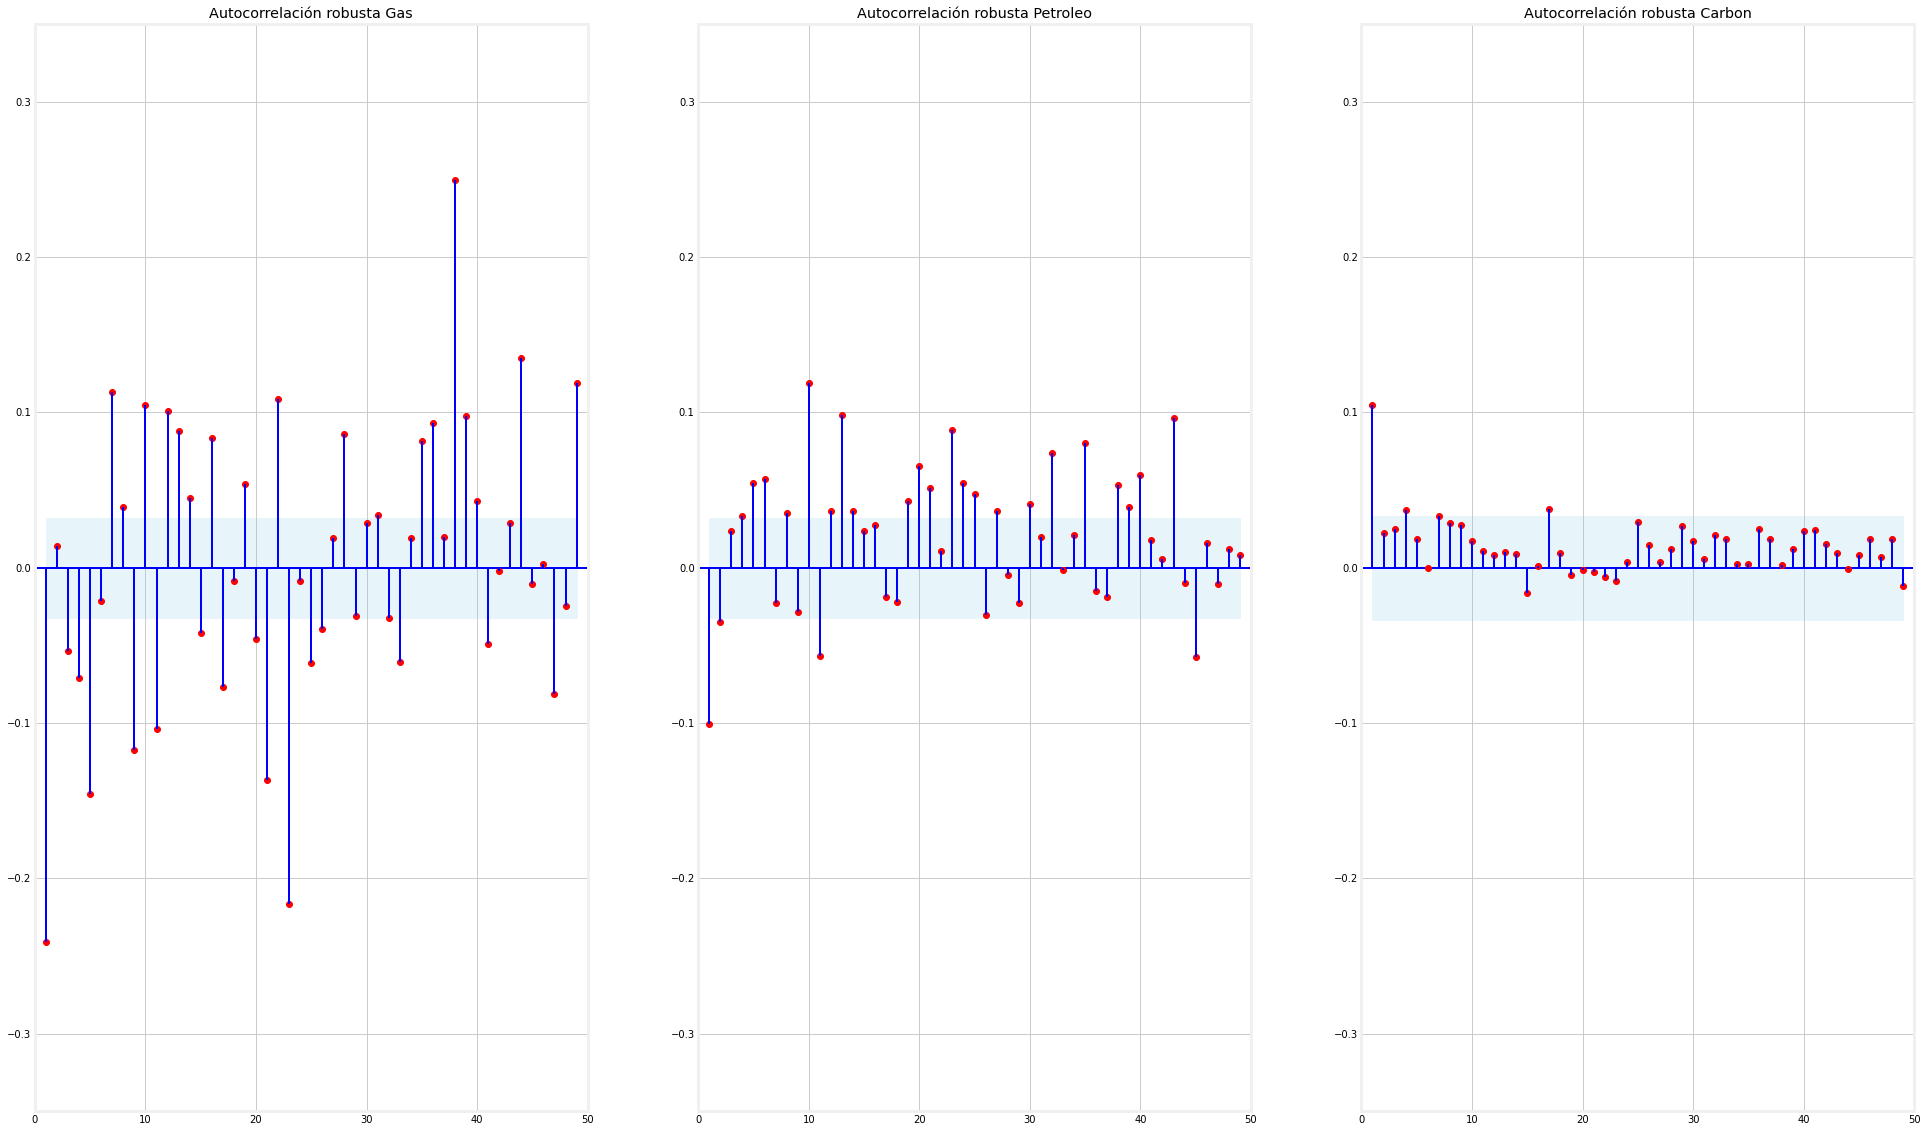

In [60]:
fig, ax = plt.subplots(ncols=3, figsize=(30,20))

# GAS #########################################################
plot_robust_autocorrelation(gas_return, ax[0], 'Autocorrelación robusta Gas')
# PETROLEO ####################################################
plot_robust_autocorrelation(petroleo_return, ax[1], 'Autocorrelación robusta Petroleo')
# CARBON ######################################################
plot_robust_autocorrelation(carbon_return, ax[2], 'Autocorrelación robusta Carbon')

### Estimador robusto autocorrelación cuadrados

In [61]:
def robust_squared_autocorrelation(x, lag):
  '''
  This function return the robust autocorrelation of the squareds
  '''
  x2 = x**2
  weight = ramsay_weights(x)
  weight2 = weight**2
  x2mean = np.sum(x2*weight2)/np.sum(weight2)
  x2 = x2 - x2mean
  numerator = np.sum(x2[:-lag]*x2[lag:]*weight2[:-lag]*weight2[lag:])
  denominator = np.sum(weight2[:-lag]*weight2[lag:])
  return numerator/denominator

In [62]:
def plot_robust_squared_autocorrelation(x, ax, title):
  '''
  This function plot the cross_corr between x and y and the 95% confidence interval
  '''
  ax.set_xlim([0,50])
  # ax.set_ylim([-.35,.35])
  ax.set_title(title)
  ax.axhline(0, color='blue', lw=2)
  ax.plot(np.arange(1,50), [robust_squared_autocorrelation(x, i) for i in np.arange(1,50)], lw=2, color='red', linestyle="", marker="o")
  for i in np.arange(1,50):
    add_vertical_line(ax, i, robust_squared_autocorrelation(x, i))
  ax.set_facecolor('w')
  ax.fill_between(np.arange(1,50), 1.96/np.sqrt(len(x)), -1.96/np.sqrt(len(x)), color='skyblue', alpha=0.2)
  ax.tick_params(axis='both')

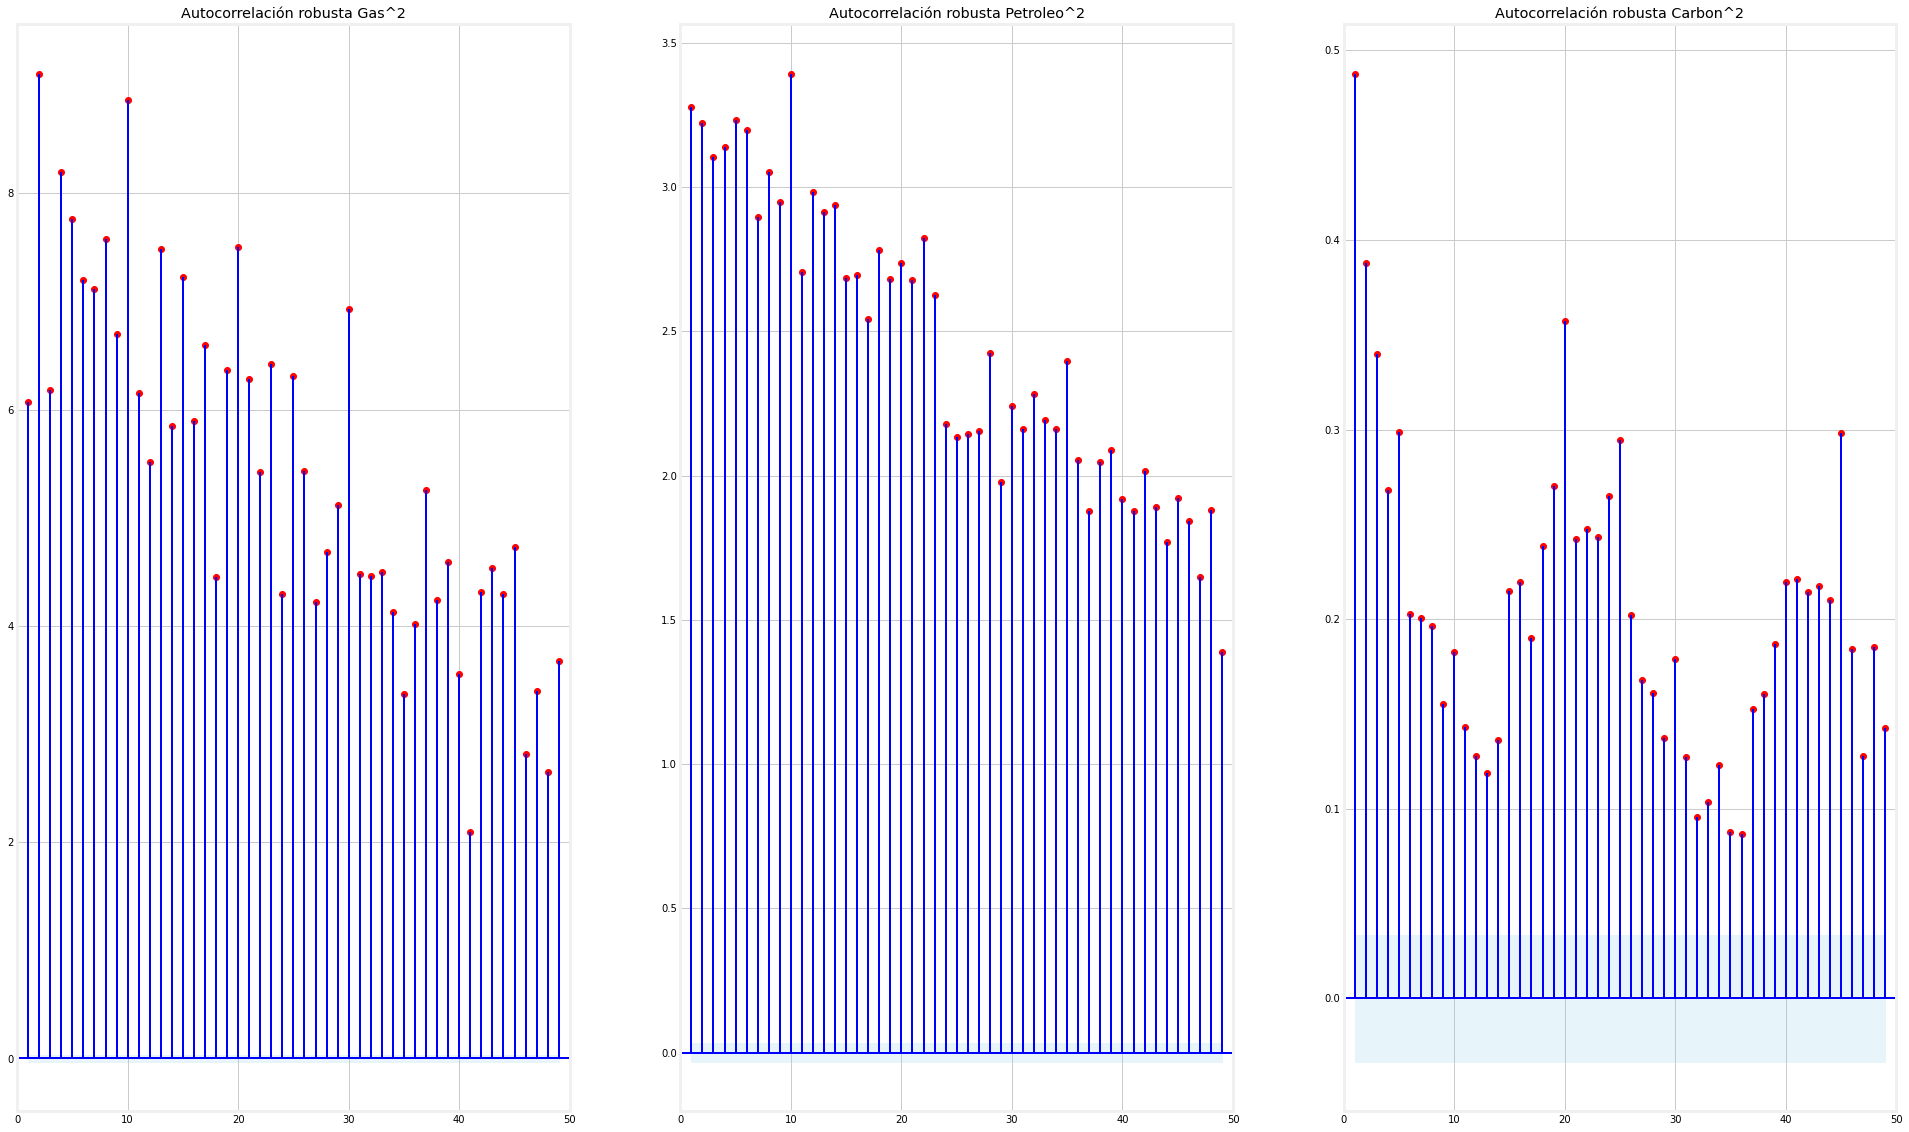

In [63]:
fig, ax = plt.subplots(ncols=3, figsize=(30,20))

# GAS #########################################################
plot_robust_squared_autocorrelation(gas_return, ax[0], 'Autocorrelación robusta Gas^2')
# PETROLEO ####################################################
plot_robust_squared_autocorrelation(petroleo_return, ax[1], 'Autocorrelación robusta Petroleo^2')
# CARBON ######################################################
plot_robust_squared_autocorrelation(carbon_return, ax[2], 'Autocorrelación robusta Carbon^2')

### Estimador robusto cross corr

In [64]:
def get_lambda_12(x,lag):
  '''
  This function return the lambda_12 parameter
  '''
  x2 = x**2
  weight = ramsay_weights(x)
  weight2 = weight**2
  xmean = np.sum(x*weight)/np.sum(weight)
  x2mean = np.sum(x2*weight2)/np.sum(weight2)
  x = x - xmean
  x2 = x2 - x2mean
  numerator = np.sum(x[:-lag]*x2[lag:]*weight[:-lag]*weight2[lag:])
  denominator = np.sum(weight[:-lag]*weight2[lag:])
  return numerator/denominator

In [65]:
def get_lambda_1(x,lag):
  '''
  This function return the lambda_1 parameter
  '''
  weight = ramsay_weights(x)
  xmean = np.sum(x*weight)/np.sum(weight)
  x = x - xmean
  numerator = np.sum(x**2*weight)
  denominator = np.sum(weight)
  return numerator/denominator

In [66]:
def get_lambda_2(x,lag):
  '''
  This function return the lambda_2 parameter
  '''
  x2 = x**2
  weight = ramsay_weights(x)
  weight2 = weight**2
  x2mean = np.sum(x2*weight2)/np.sum(weight2)
  x2 = x2 - x2mean
  numerator = np.sum(x2**2*weight2)
  denominator = np.sum(weight2)
  return numerator/denominator

In [67]:
def robust_cross_corr(x, lag):
  '''
  This function return the robust cross correlation
  '''
  lambda_12 = get_lambda_12(x, lag)
  lambda_1 = get_lambda_1(x, lag)
  lambda_2 = get_lambda_2(x, lag)
  return lambda_12/np.sqrt(lambda_1*lambda_2)
robust_cross_corr(gas_return, 20)

0.01903745358580426

In [68]:
def plot_robust_cross_corr(x, ax, title):
  '''
  This function plot the cross_corr between x and y and the 95% confidence interval
  '''
  ax.set_xlim([0,50])
  ax.set_ylim([-.1,.1])
  ax.set_title(title)
  ax.axhline(0, color='blue', lw=2)
  ax.plot(np.arange(1,50), [robust_cross_corr(x, i) for i in np.arange(1,50)], lw=2, color='red', linestyle="", marker="o")
  for i in np.arange(1,50):
    add_vertical_line(ax, i, robust_cross_corr(x, i))
  ax.set_facecolor('w')
  ax.fill_between(np.arange(1,50), 1.96/np.sqrt(len(x)), -1.96/np.sqrt(len(x)), color='skyblue', alpha=0.2)
  ax.tick_params(axis='both')

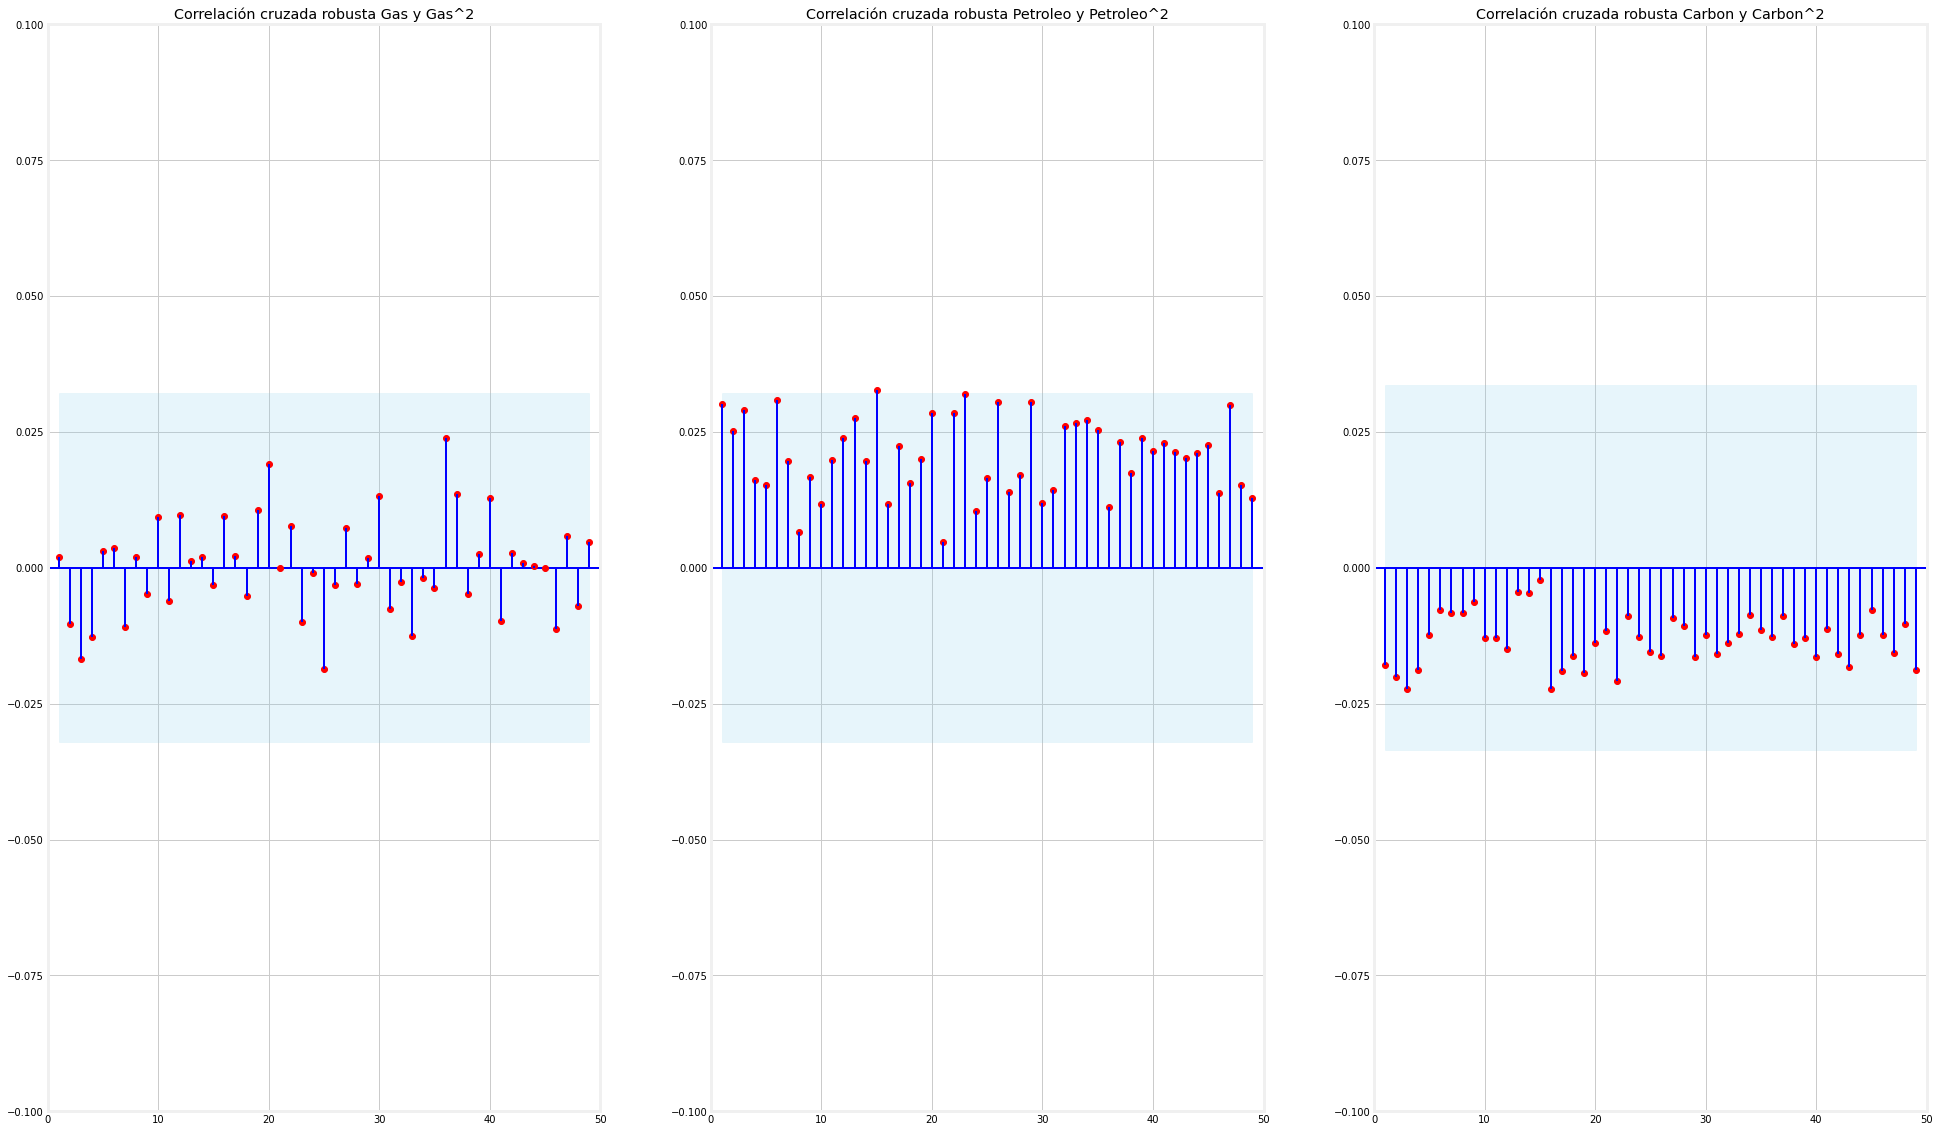

In [69]:
fig, ax = plt.subplots(ncols=3, figsize=(30,20))

# GAS #########################################################
plot_robust_cross_corr(gas_return, ax[0], 'Correlación cruzada robusta Gas y Gas^2')
# PETROLEO ####################################################
plot_robust_cross_corr(petroleo_return, ax[1], 'Correlación cruzada robusta Petroleo y Petroleo^2')
# CARBON ######################################################
plot_robust_cross_corr(carbon_return, ax[2], 'Correlación cruzada robusta Carbon y Carbon^2')